#Bangkok Airbnb Accommodation Prices

Baila Zwiebel

In this lab, I tried to perform various types of regression on my data.

Bangjoj Naighborhood and room type are nominal categorical.

Price, latitude, longitude are numeric continuus
all rest are numeric discrete.

#Research Questions

My main research question is I want to look at how seasonal fluctuations and other aspects affect accommodation prices in Bangkok, and if we can predict the prices for the same period next year to give me the cheapest area and time to visit Bangkok next year?

My main research question is can we predict accomodation prices in bangkok for 2025?
Smaller questions:
- What neighbourhood in Bangkok is cheapest?
- Whats the cheapest season for each neighbourhood?
- How does seasons affect the pricing and availability of listings?
- How does customer satisfaction, as reflected by reviews per month, affect the likelihood of a property being booked?
- What are the common characteristics of highly rated listings?
- Which types of properties (apartments, villas, cottages) are most popular among renters?
- How does the number of reviews correlate with the demand for certain listings?
- How do the lengths of stays vary by season and what impact does this have on pricing?
- How do the availability metrics (availability_30, availability_60, availability_90, availability_365) correlate with pricing? Does higher availability lead to lower prices?
- Can seasonal availability data predict pricing trends for peak and off-peak seasons?
- Which neighborhoods show the highest variability in pricing within the same house type?
- How do various review scores (cleanliness, check-in, communication) affect the price and booking frequency of listings?
- Does the overall review score rating correlate with the price fluctuations throughout the year?
- Can you use the features such as number of reviews, review scores, and host information to predict future pricing trends or the probability of a listing being booked?

#Project Plan

1. Data Preperation
- Data Loading, Data Cleaning, Data exploration
2. In depth Exploratory Data Analysis
3. Predictive Medeling

#Import Libraries

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Mount drive

In [2]:
from google.colab import drive #mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Data

In [3]:
path_data1 = "/content/drive/MyDrive/CS 356/Final Project/listings(3).csv.gz" #Change path for your drive
listings_data = pd.read_csv(path_data1, compression='gzip')# read the csv file
pd.set_option('display.max_columns', None) #ensures all columns are printed
listings_data.head() # print first 5 rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934,https://www.airbnb.com/rooms/27934,20231225202639,2023-12-27,city scrape,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,NaN,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,https://www.airbnb.com/users/show/120437,Nuttee,2010-05-08,"Bangkok, Thailand","Hi All, I am nuttee patranavik from Bangkok, T...",within an hour,100%,86%,f,https://a0.muscache.com/im/pictures/user/d05a6...,https://a0.muscache.com/im/pictures/user/d05a6...,Victory Monument,2,2,"['email', 'phone']",t,t,"Samsen Nai, Bangkok, Thailand",Ratchathewi,NaN,13.75983,100.54134,Entire condo,Entire home/apt,3,NaN,1.5 baths,NaN,1.0,[],"$1,903.00",3,90,3,3,90,90,3.0,90.0,NaN,t,0,24,54,329,2023-12-27,64,0,0,2012-04-07,2020-01-06,4.85,4.95,4.81,4.97,4.91,4.66,4.75,NaN,f,2,2,0,0,0.45
1,27979,https://www.airbnb.com/rooms/27979,20231225202639,2023-12-26,previous scrape,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,https://www.airbnb.com/users/show/120541,Emy,2010-05-08,"Bangkok, Thailand",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/120541/profil...,https://a0.muscache.com/im/users/120541/profil...,NaN,2,4,"['email', 'phone']",t,f,NaN,Bang Na,NaN,13.66818,100.61674,Private room in rental unit,Private room,2,NaN,1 bath,NaN,2.0,[],"$1,316.00",1,730,1,1,730,730,1.0,730.0,NaN,t,0,0,0,0,2023-12-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
2,28745,https://www.airbnb.com/rooms/28745,20231225202639,2023-12-26,previous scrape,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,NaN,Ramkumheang neigbourhood - hip place with food...,https://a0.muscache.com/pictures/160369/92a7ec...,123784,https://www.airbnb.com/users/show/123784,Familyroom,2010-05-12,"Bangkok, Thailand",Welcome to Familyroom Apartment.\r\n\r\nA Chic...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/123784/profil...,https://a0.muscache.com/im/users/123784/profil...,Bang Kapi,1,1,"['email', 'phone']",t,f,"Bangkok, Thailand",Bang Kapi,NaN,13.75232,100.62402,Private room in rental unit,Private room,2,NaN,1 bath,NaN,1.0,[],$800.00,60,730,60,60,730,730,60.0,730.0,NaN,t,0,0,0,0,2023-12-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,820395,https://www.airbnb.com/rooms/820395,20231225202639,2023-12-26,city scrape,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/a2b17c9f-bf74...,822284,https://www.airbnb.com/users/show/822284,Rae And Charlie,2011-07-15,NaN,Ake and Sah are your hosts whilst you stay at ...,within a few hours,100%,97%,f,https://a0.muscache.com/im/pictures/user/c4e88...,https://a0.muscache.com/im/pictu

In [4]:
path_data2 = "/content/drive/MyDrive/CS 356/Final Project/calendar(4).csv.gz"  #Change path for your drive
calendar_data = pd.read_csv(path_data2, compression='gzip')
calendar_data.head()

<ipython-input-4-d7fb04c059ed>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_data = pd.read_csv(path_data2, compression='gzip')


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,27934,2023-12-27,f,$55.00,NaN,3.0,90.0
1,27934,2023-12-28,f,$55.00,NaN,3.0,90.0
2,27934,2023-12-29,f,$55.00,NaN,3.0,90.0
3,27934,2023-12-30,f,$55.00,NaN,3.0,90.0
4,27934,2023-12-31,f,$55.00,NaN,3.0,90.0


#About Data

In [5]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22104 entries, 0 to 22103
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22104 non-null  int64  
 1   listing_url                                   22104 non-null  object 
 2   scrape_id                                     22104 non-null  int64  
 3   last_scraped                                  22104 non-null  object 
 4   source                                        22104 non-null  object 
 5   name                                          22104 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         10200 non-null  object 
 8   picture_url                                   22104 non-null  object 
 9   host_id                                       22104 non-null 

In [6]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068302 entries, 0 to 8068301
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 430.9+ MB


The listings dataset 22,104 entries, each representing an individual airbnb listing. The dataset comprises 75 columns, detailing various attributes of each listing.There is missing values and uncessary columns in this dataset which I will remove.

The dataset features the following columns:
    
    id: Numerical, a unique identifier for each listing.
    listing_url: Text, URL link to the listing's page.
    scrape_id: Numerical, an identifier for the scraping session during which the data was collected.
    last_scraped: Date, the last date the information was scraped in YYYY-MM-DD format.
    source: Text, the source from where the data was scraped.
    name: Text, the title or name of the listing.
    description: Numerical (but likely intended to be Text), describes the listing in detail (all values missing).
    neighborhood_overview: Text, a description of the neighborhood provided by the host.
    picture_url: Text, URL of the image representing the listing.
    host_id: Numerical, a unique identifier for the host of the listing.
    host_url: Text, URL link to the host’s profile.
    host_name: Text, the name of the host.
    host_since: Date, the date when the host registered on the platform in YYYY-MM-DD format.
    host_location: Text, the general location of the host.
    host_about: Text, a biography or description provided by the host about themselves.
    host_response_time: Text, categorical data indicating the typical response time of the host.
    host_response_rate: Text, the percentage rate at which the host responds to messages.
    host_acceptance_rate: Text, the percentage rate at which the host accepts booking requests.
    host_is_superhost: Text, categorical data indicating whether the host is classified as a "superhost".
    host_thumbnail_url: Text, URL of the host's thumbnail image.
    host_picture_url: Text, URL of the host's profile picture.
    host_neighbourhood: Text, the neighborhood the host lists as their location.
    host_listings_count: Numerical, the number of listings the host has in total.
    host_total_listings_count: Numerical, repeats the count of total listings by the host.
    host_verifications: Text, methods the host has used to verify their identity.
    host_has_profile_pic: Text, categorical data indicating if the host has a profile picture.
    host_identity_verified: Text, categorical data indicating if the host's identity has been officially verified.
    neighbourhood: Text, the neighborhood of the listing.
    neighbourhood_cleansed: Text, a standardized version of the neighborhood name.
    neighbourhood_group_cleansed: Numerical (but likely intended to be Text), a group classification of the neighborhood (all values missing).
    latitude: Numerical, geographic coordinate specifying the north-south position of the listing.
    longitude: Numerical, geographic coordinate specifying the east-west position of the listing.
    property_type: Text, describes the type of property being listed.
    room_type: Text, the category of room type being offered.
    accommodates: Numerical, the number of people the listing accommodates.
    bathrooms: Numerical, number of bathrooms in the listing (all values missing).
    bathrooms_text: Text, the descriptive count of bathrooms, including partial bathrooms.
    bedrooms: Numerical, number of bedrooms in the listing (almost all values missing).
    beds: Numerical, number of beds in the listing.
    amenities: Text, a list of amenities offered with the listing.
    price: Text, the price per night for the listing.
    minimum_nights: Numerical, the minimum number of nights required for booking.
    maximum_nights: Numerical, the maximum number of nights allowed for booking.
    minimum_minimum_nights: Numerical, possibly a redundant or more specific indicator of minimum nights based on certain conditions.
    maximum_minimum_nights: Numerical, possibly a redundant or more specific indicator of minimum nights for other conditions.
    minimum_maximum_nights: Numerical, possibly detailing the minimum of the maximum nights under certain conditions.
    maximum_maximum_nights: Numerical, possibly detailing the maximum of the maximum nights under certain conditions.
    minimum_nights_avg_ntm: Numerical, average of minimum nights required, calculated over a near-term period.
    maximum_nights_avg_ntm: Numerical, average of maximum nights allowed, calculated over a near-term period.
    calendar_updated: Numerical, indicates when the calendar was last updated (all values missing).
    has_availability: Text, indicates if the listing currently has availability.
    availability_30: Numerical, number of days available in the next 30 days.
    availability_60: Numerical, number of days available in the next 60 days.
    availability_90: Numerical, number of days available in the next 90 days.
    availability_365: Numerical, number of days available in the next 365 days.
    calendar_last_scraped: Date, the last date the calendar information was scraped in YYYY-MM-DD format.
    number_of_reviews: Numerical, the total number of reviews the listing has received.
    number_of_reviews_ltm: Numerical, the number of reviews left in the last twelve months.
    number_of_reviews_l30d: Numerical, the number of reviews left in the last 30 days.
    first_review: Date, date of the first review in YYYY-MM-DD format.
    last_review: Date, date of the latest review in YYYY-MM-DD format.
    review_scores_rating: Numerical, the average overall rating the listing has received.
    review_scores_accuracy: Numerical, the average rating for the accuracy of the listing description.
    review_scores_cleanliness: Numerical, the average rating for cleanliness.
    review_scores_checkin: Numerical, the average rating for the check-in process.
    review_scores_communication: Numerical, the average rating for communication with the host.
    review_scores_location: Numerical, the average rating for the location of the listing.
    review_scores_value: Numerical, the average rating for the value of the listing.
    license: Numerical (likely intended to be Text), the license or registration number of the listing (all values missing).
    instant_bookable: Text, indicates whether the listing can be booked instantly without host approval.
    calculated_host_listings_count: Numerical, calculated count of listings managed by the host.
    calculated_host_listings_count_entire_homes: Numerical, count of entire homes listed by the host.
    calculated_host_listings_count_private_rooms: Numerical, count of private rooms listed by the host.
    calculated_host_listings_count_shared_rooms: Numerical, count of shared rooms listed by the host.
    reviews_per_month: Numerical, average number of reviews received per month.

The calendar dataset has 8,068,302 entries, each representing an individual record with the cost for each date in the calender year for the each property. .There is missing values and uncessary columns in this dataset which I will remove. I will also clean the data to make it more consistent and accurate.

    listing_id: Numerical, a unique identifier assigned to each listing.
    date: Text, the date for which the availability and pricing data are recorded.
    available: Text, indicates whether the listing is available on the specified date. Will change to a boolean value
    price: Text, the price of the listing for the given date. Will chnage to a number
    adjusted_price: Text, the price after any adjustments from the original price listed. Will remove.
    minimum_nights: Numerical, the minimum number of nights required for a booking on the specified date.
    maximum_nights: Numerical, the maximum number of nights a guest can book the listing for the specified date.



#Clean Listings Data

## Finding NaNs

In [7]:
nans_listing = listings_data.isna().sum()
pd.set_option('display.max_rows', None) # Lists all columns instead of just first and last few.
nans_listing

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                     22104
neighborhood_overview                           11904
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           1
host_since                                          0
host_location                                    5410
host_about                                       8958
host_response_time                               4371
host_response_rate                               4371
host_acceptance_rate                             3877
host_is_superhost           

Will remove: Either unecessary or missing a lot of data or duplicate columns.

Host_thumbnail_url','calendar_last_scraped','scrape_id','bathrooms_text','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','minimum_maximum_nights','maximum_maximum_nights','number_of_reviews_ltm','calendar_updated','number_of_reviews_l30d','first_review','last_review','maximum_nights_avg_ntm','amenities','bedrooms','instant_bookable','host_picture_url','calculated_host_listings_count','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes','source','description','neighborhood_overview','license','neighbourhood','host_listings_count','last_scraped', 'neighbourhood_group_cleansed','host_is_superhost','host_has_profile_pic', 'host_identity_verified','host_response_rate', 'host_acceptance_rate', 'host_about', 'host_response_time', 'host_location','host_url', 'picture_url', 'host_since', 'host_neighbourhood', 'host_verifications','reviews_per_month'


In [8]:
listings_data['bathrooms'] = listings_data['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
cleaned_listings_data= listings_data.drop(columns=['host_thumbnail_url','calendar_last_scraped','bathrooms_text','scrape_id','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','minimum_maximum_nights','maximum_maximum_nights','number_of_reviews_ltm','calendar_updated','number_of_reviews_l30d','first_review','last_review','maximum_nights_avg_ntm','amenities','bedrooms','instant_bookable','host_picture_url','calculated_host_listings_count','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes','source','description','neighborhood_overview','license','neighbourhood','host_listings_count','last_scraped', 'neighbourhood_group_cleansed','host_is_superhost','host_has_profile_pic', 'host_identity_verified','host_response_rate', 'host_acceptance_rate', 'host_about', 'host_response_time', 'host_location','host_url', 'picture_url', 'host_since', 'host_neighbourhood', 'host_verifications','reviews_per_month'])
cleaned_listings_data.head()

,id,listing_url,name,host_id,host_name,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,27934,https://www.airbnb.com/rooms/27934,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,120437,Nuttee,2,Ratchathewi,13.75983,100.54134,Entire condo,Entire home/apt,3,1.5,1.0,"$1,903.00",3,90,t,0,24,54,329,64,4.85,4.95,4.81,4.97,4.91,4.66,4.75
1,27979,https://www.airbnb.com/rooms/27979,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,120541,Emy,4,Bang Na,13.66818,100.61674,Private room in rental unit,Private room,2,1.0,2.0,"$1,316.00",1,730,t,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28745,https://www.airbnb.com/rooms/28745,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,123784,Familyroom,1,Bang Kapi,13.75232,100.62402,Private room in rental unit,Private room,2,1.0,1.0,$800.00,60,730,t,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,820395,https://www.airbnb.com/rooms/820395,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,822284,Rae And Charlie,9,Bang Sue,13.83026,100.52082,Entire guesthouse,Entire home/apt,2,1.0,1.0,$700.00,7,365,t,14,44,74,349,13,4.77,4.83,4.69,4.85,4.92,3.83,4.69
4,1255386,https://www.airbnb.com/rooms/1255386,Rental unit in Dusit · 1 bedroom · 3 beds · 1 ...,6838199,Sirikamol,4,Dusit,13.77073,100.50478,Private room in rental unit,Private room,3,1.0,3.0,"$7,500.00",1,365,t,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Rename columns and make data in correct form.

In [9]:
cleaned_listings_data.columns = cleaned_listings_data.columns.str.lower().str.replace(' ', '_')
cleaned_listings_data['price'] = cleaned_listings_data['price'].replace('[\$,]', '', regex=True).astype(float)
cleaned_listings_data.rename(columns={
    'name': 'listing_name',
    'host_total_listings_count': 'host_listings_count',
    'neighbourhood_cleansed': 'bangkok_neighbourhood',
    'accommodates': 'guest_capacity',
    'minimum_nights': 'minimum_nights_required',
    'has_availability': 'available',
    'availability_30': 'days_available_30',
    'availability_60': 'days_available_60',
    'availability_90': 'days_available_90',
    'availability_365': 'days_available_365'
}, inplace=True)
cleaned_listings_data.head()

,id,listing_url,listing_name,host_id,host_name,host_listings_count,bangkok_neighbourhood,latitude,longitude,property_type,room_type,guest_capacity,bathrooms,beds,price,minimum_nights_required,maximum_nights,available,days_available_30,days_available_60,days_available_90,days_available_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,27934,https://www.airbnb.com/rooms/27934,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,120437,Nuttee,2,Ratchathewi,13.75983,100.54134,Entire condo,Entire home/apt,3,1.5,1.0,1903.0,3,90,t,0,24,54,329,64,4.85,4.95,4.81,4.97,4.91,4.66,4.75
1,27979,https://www.airbnb.com/rooms/27979,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,120541,Emy,4,Bang Na,13.66818,100.61674,Private room in rental unit,Private room,2,1.0,2.0,1316.0,1,730,t,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28745,https://www.airbnb.com/rooms/28745,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,123784,Familyroom,1,Bang Kapi,13.75232,100.62402,Private room in rental unit,Private room,2,1.0,1.0,800.0,60,730,t,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,820395,https://www.airbnb.com/rooms/820395,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,822284,Rae And Charlie,9,Bang Sue,13.83026,100.52082,Entire guesthouse,Entire home/apt,2,1.0,1.0,700.0,7,365,t,14,44,74,349,13,4.77,4.83,4.69,4.85,4.92,3.83,4.69
4,1255386,https://www.airbnb.com/rooms/1255386,Rental unit in Dusit · 1 bedroom · 3 beds · 1 ...,6838199,Sirikamol,4,Dusit,13.77073,100.50478,Private room in rental unit,Private room,3,1.0,3.0,7500.0,1,365,t,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Summary Statistics for full cleaned listings

In [10]:
cleaned_listings_data.describe()

,id,host_id,host_listings_count,latitude,longitude,guest_capacity,bathrooms,beds,price,minimum_nights_required,maximum_nights,days_available_30,days_available_60,days_available_90,days_available_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.210400e+04,2.210400e+04,22104.000000,22104.000000,22104.000000,22104.000000,21908.000000,21635.000000,21582.000000,22104.000000,22104.000000,22104.000000,22104.000000,22104.000000,22104.000000,22104.000000,14167.000000,14162.000000,14161.00000,14155.000000,14162.000000,14154.000000,14154.000000
mean,4.311415e+17,2.070399e+08,46.379343,13.744426,100.562033,3.137984,1.430277,1.829674,3104.512093,13.874186,600.748779,14.570033,33.829805,56.001764,213.574557,16.850389,4.658263,4.699290,4.66048,4.729327,4.758447,4.616926,4.630731
std,4.450022e+17,1.737502e+08,98.077562,0.041207,0.049244,2.270743,1.266949,2.298728,17681.953565,45.670650,1034.286568,11.605580,23.084328,33.744242,135.820058,43.090693,0.565863,0.545071,0.55897,0.552314,0.528029,0.532128,0.566440
min,2.793400e+04,2.144700e+04,0.000000,13.527300,100.329550,1.000000,0.000000,1.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.924233e+07,4.853662e+07,3.000000,13.719570,100.532250,2.000000,1.000000,1.000000,999.000000,1.000000,365.000000,0.000000,9.000000,27.000000,86.000000,0.000000,4.585000,4.660000,4.57000,4.710000,4.750000,4.500000,4.550000
50%,5.381190e+07,1.652139e+08,10.000000,13.738820,100.563800,2.000000,1.000000,1.000000,1506.000000,1.000000,365.000000,16.000000,41.000000,70.000000,255.000000,2.000000,4.830000,4.870000,4.83000,4.910000,4.940000,4.750000,4.780000
75%,8.897166e+17,3.336703e+08,45.000000,13.758170,100.585010,4.000000,1.500000,2.000000,2632.000000,10.000000,1125.000000,26.000000,55.000000,85.000000,350.000000,13.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
max,1.053584e+18,5.522846e+08,875.000000,13.953540,100.923710,16.000000,49.000000,150.000000,1000000.000000,1115.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,1809.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


##Split into Individual Dataframes

In [11]:
# DataFrame for Listing Information
listing_details = cleaned_listings_data[['id', 'listing_name', 'property_type', 'room_type', 'guest_capacity', 'bathrooms', 'beds', 'price','host_id']].drop_duplicates()

# DataFrame for Host Information
host_info = cleaned_listings_data[['host_id', 'host_name', 'host_listings_count']].drop_duplicates()

# DataFrame for Location Information
location_info = cleaned_listings_data[['id', 'bangkok_neighbourhood', 'latitude', 'longitude']].drop_duplicates()

# DataFrame for Booking Details
booking_details = cleaned_listings_data[['id', 'minimum_nights_required', 'maximum_nights', 'days_available_365']].drop_duplicates()

# DataFrame for Review Scores
review_scores = cleaned_listings_data[['id', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].drop_duplicates()


##Drop rows that have NaNs in each individual dataframe

In [12]:
listing_details_cleaned = listing_details.dropna(subset=['id', 'listing_name', 'property_type', 'room_type', 'guest_capacity', 'bathrooms', 'beds', 'price','host_id'])
listing_details_cleaned.head()

#listing_details_cleaned.nunique() #look at unique values in each column

,id,listing_name,property_type,room_type,guest_capacity,bathrooms,beds,price,host_id
0,27934,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,Entire condo,Entire home/apt,3,1.5,1.0,1903.0,120437
1,27979,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,Private room in rental unit,Private room,2,1.0,2.0,1316.0,120541
2,28745,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,Private room in rental unit,Private room,2,1.0,1.0,800.0,123784
3,820395,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,Entire guesthouse,Entire home/apt,2,1.0,1.0,700.0,822284
4,1255386,Rental unit in Dusit · 1 bedroom · 3 beds · 1 ...,Private room in rental unit,Private room,3,1.0,3.0,7500.0,6838199


In [13]:
host_info_cleaned = host_info.dropna(subset=['host_id', 'host_name', 'host_listings_count'])
host_info_cleaned.head()

#host_info_cleaned.nunique() #look at unique values in each column

,host_id,host_name,host_listings_count
0,120437,Nuttee,2
1,120541,Emy,4
2,123784,Familyroom,1
3,822284,Rae And Charlie,9
4,6838199,Sirikamol,4


In [14]:
location_info_cleaned = location_info.dropna(subset=['id', 'bangkok_neighbourhood', 'latitude', 'longitude'])
location_info_cleaned.head()
#location_info_cleaned.nunique() #look at unique values in each column

,id,bangkok_neighbourhood,latitude,longitude
0,27934,Ratchathewi,13.75983,100.54134
1,27979,Bang Na,13.66818,100.61674
2,28745,Bang Kapi,13.75232,100.62402
3,820395,Bang Sue,13.83026,100.52082
4,1255386,Dusit,13.77073,100.50478


In [15]:
booking_details_cleaned = booking_details.dropna(subset=['id', 'minimum_nights_required', 'maximum_nights', 'days_available_365'])
booking_details_cleaned.head()
#booking_details_cleaned.nunique() #look at unique values in each column

,id,minimum_nights_required,maximum_nights,days_available_365
0,27934,3,90,329
1,27979,1,730,0
2,28745,60,730,0
3,820395,7,365,349
4,1255386,1,365,0


In [16]:
review_scores_cleaned = review_scores.dropna(subset=['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',  'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value' ])
review_scores_cleaned.head()
#review_scores_cleaned.nunique() #look at unique values in each column

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,27934,4.85,4.95,4.81,4.97,4.91,4.66,4.75
3,820395,4.77,4.83,4.69,4.85,4.92,3.83,4.69
5,35780,4.75,5.00,4.50,4.25,4.75,4.75,5.00
6,822214,4.84,4.78,4.70,4.74,4.96,4.41,4.85
7,48736,5.00,5.00,5.00,5.00,5.00,5.00,5.00


##Summary statistics for each new dataframe

In [17]:
listing_details_cleaned.describe()

,id,guest_capacity,bathrooms,beds,price,host_id
count,2.093700e+04,20937.000000,20937.000000,20937.000000,20937.000000,2.093700e+04
mean,4.368704e+17,3.156135,1.433539,1.828868,3126.090557,2.064608e+08
std,4.445171e+17,2.289021,1.278557,2.294994,17931.238161,1.736361e+08
min,2.793400e+04,1.000000,0.000000,1.000000,250.000000,2.144700e+04
25%,2.908945e+07,2.000000,1.000000,1.000000,1000.000000,4.821529e+07
50%,5.483396e+17,2.000000,1.000000,1.000000,1507.000000,1.642340e+08
75%,8.903788e+17,4.000000,1.500000,2.000000,2639.000000,3.315801e+08
max,1.053584e+18,16.000000,49.000000,150.000000,1000000.000000,5.521923e+08


In [18]:
host_info_cleaned.describe()

,host_id,host_listings_count
count,7.646000e+03,7646.000000
mean,1.881924e+08,6.555192
std,1.681571e+08,26.038157
min,2.144700e+04,0.000000
25%,4.377244e+07,1.000000
50%,1.325562e+08,2.000000
75%,2.909074e+08,5.000000
max,5.522846e+08,875.000000


In [19]:
location_info_cleaned.describe()

,id,latitude,longitude
count,2.210400e+04,22104.000000,22104.000000
mean,4.311415e+17,13.744426,100.562033
std,4.450022e+17,0.041207,0.049244
min,2.793400e+04,13.527300,100.329550
25%,2.924233e+07,13.719570,100.532250
50%,5.381190e+07,13.738820,100.563800
75%,8.897166e+17,13.758170,100.585010
max,1.053584e+18,13.953540,100.923710


In [20]:
booking_details_cleaned.describe()

,id,minimum_nights_required,maximum_nights,days_available_365
count,2.210400e+04,22104.000000,22104.000000,22104.000000
mean,4.311415e+17,13.874186,600.748779,213.574557
std,4.450022e+17,45.670650,1034.286568,135.820058
min,2.793400e+04,1.000000,1.000000,0.000000
25%,2.924233e+07,1.000000,365.000000,86.000000
50%,5.381190e+07,1.000000,365.000000,255.000000
75%,8.897166e+17,10.000000,1125.000000,350.000000
max,1.053584e+18,1115.000000,100000.000000,365.000000


In [21]:
review_scores_cleaned.describe()

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.414900e+04,14149.00000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,3.823285e+17,4.65910,4.699509,4.660899,4.729707,4.758791,4.617215,4.630954
std,4.276217e+17,0.56298,0.544156,0.557651,0.551300,0.527006,0.531283,0.566042
min,2.793400e+04,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.697365e+07,4.59000,4.660000,4.570000,4.710000,4.750000,4.500000,4.550000
50%,4.537754e+07,4.83000,4.870000,4.830000,4.910000,4.940000,4.750000,4.780000
75%,8.397166e+17,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,1.051231e+18,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#Find Outliers

##Visualize the outliers

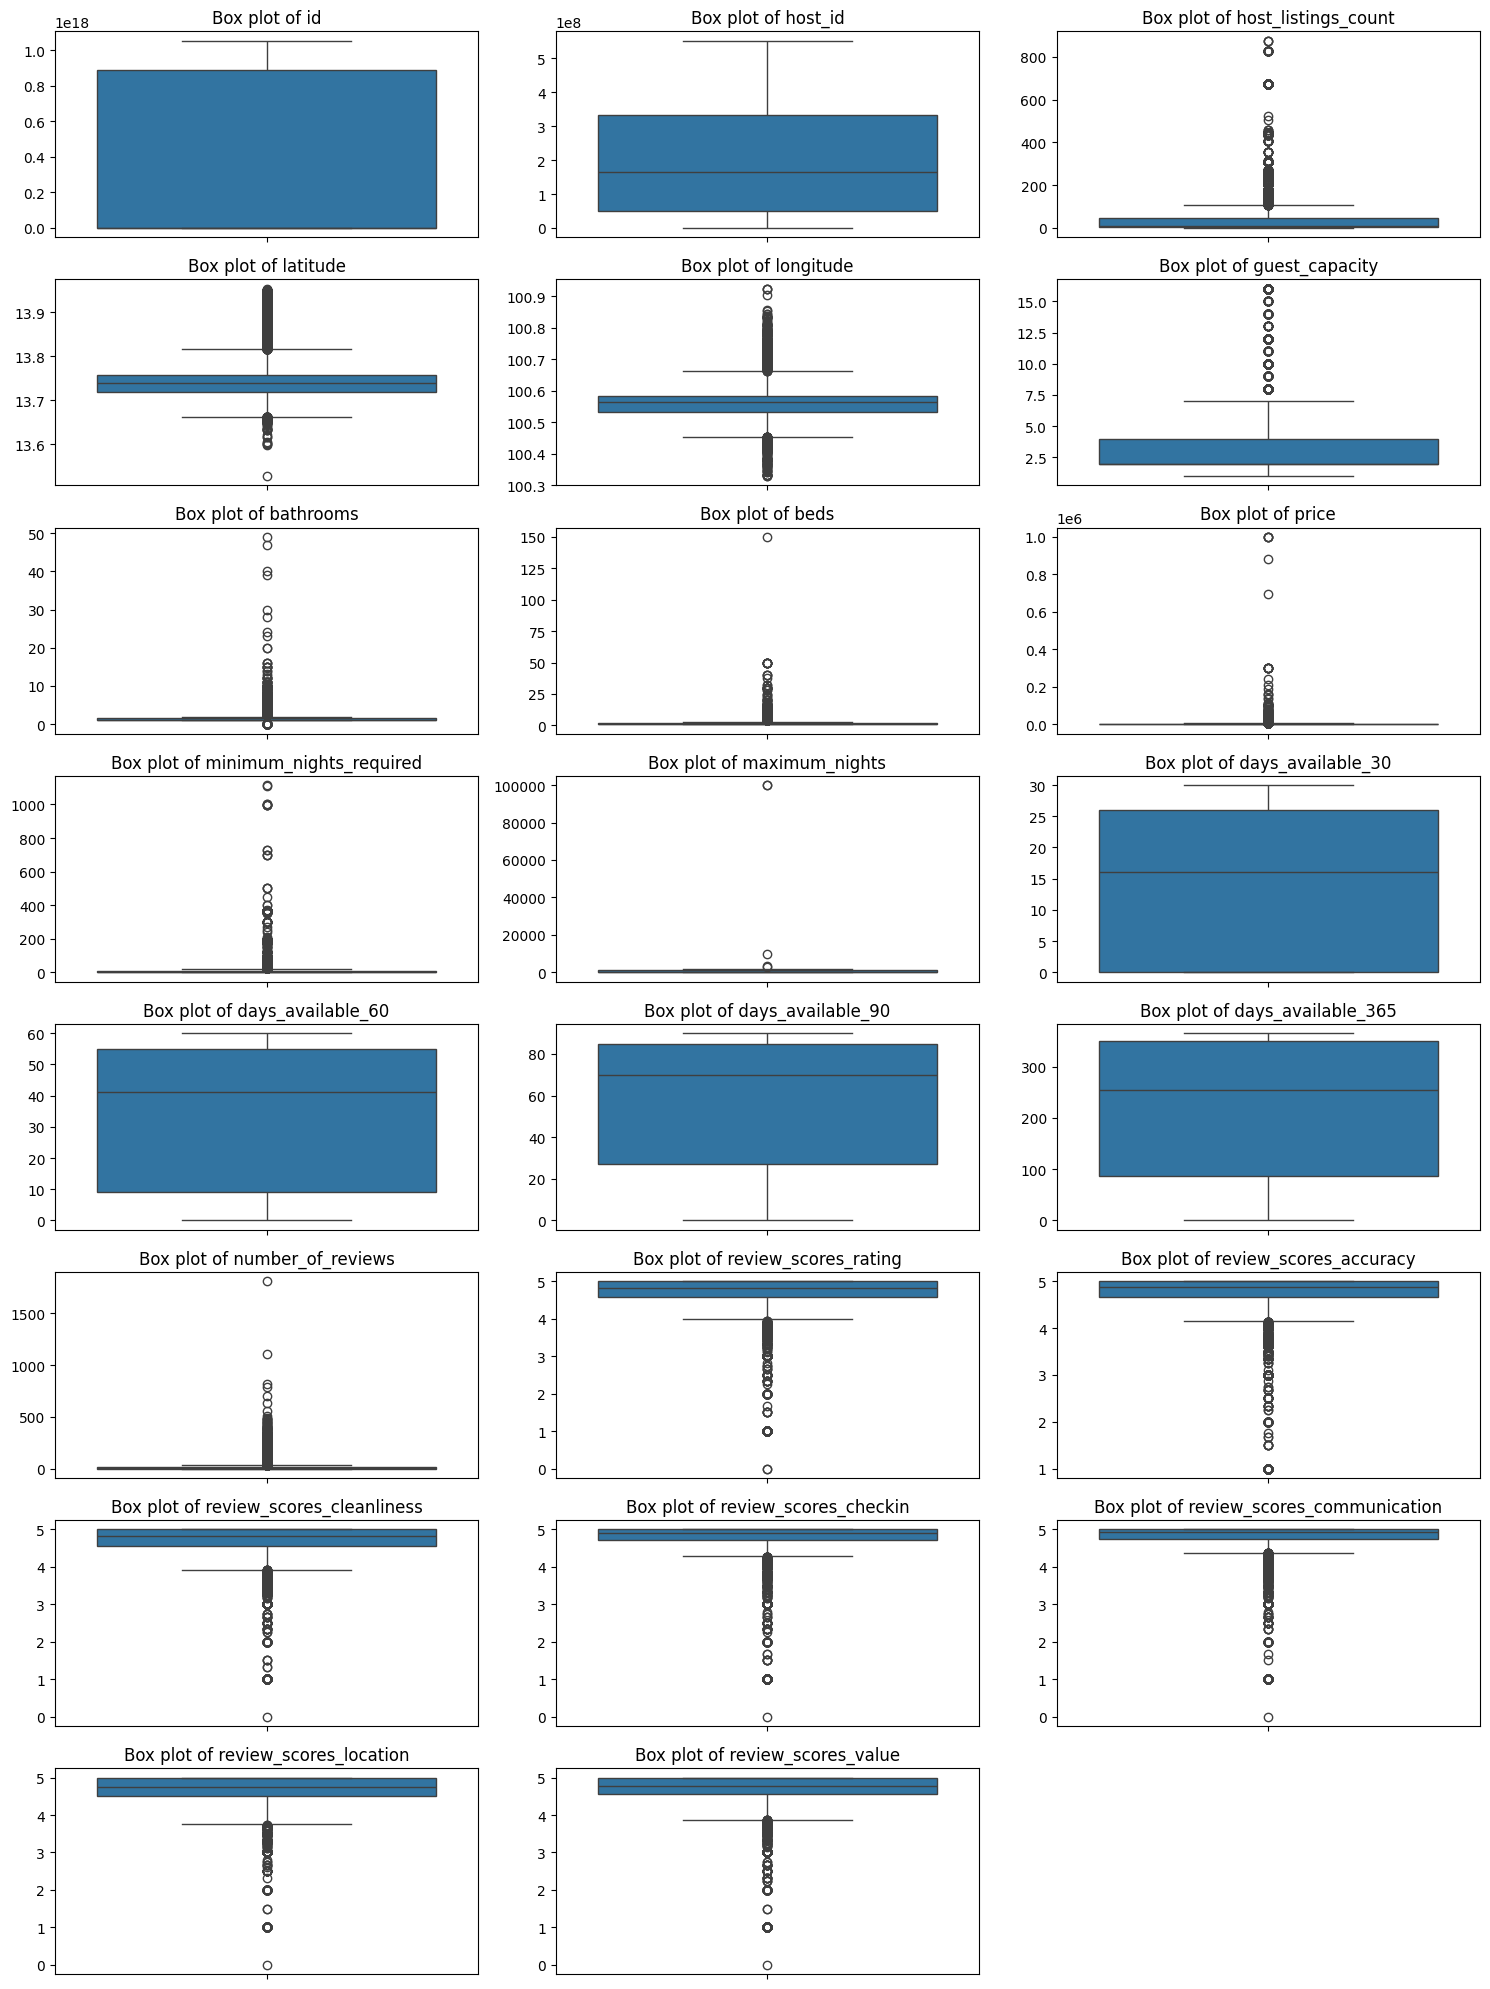

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_listings_data1 = cleaned_listings_data.select_dtypes(include=[np.number])
# Create subplots
# Calculate the number of rows needed to plot all columns
n_cols = len(cleaned_listings_data1.columns)
n_rows = n_cols // 3 + (n_cols % 3 > 0)  # Adds an extra row if there are any remainder columns

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Loop through the features and create a boxplot for each
for i, col in enumerate(cleaned_listings_data1.columns):
    sns.boxplot(y=cleaned_listings_data1[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused axes
for ax in axes[n_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

##Find the outliers

I want to try to find the outliers in the specific neighbourhoods just in case some neighborhoods have a higher price and would mess with the mean. I also want to see if certain hosts also have different prices...

In [23]:
def remove_outliers(df):
    # Define the function to filter out outliers within each group
    def filter_outliers(group):
        Q1 = group['price'].quantile(0.25)
        Q3 = group['price'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Selecting non-outliers within the bounds
        non_outliers_mask = (group['price'] >= lower_bound) & (group['price'] <= upper_bound)
        return group.loc[non_outliers_mask]

    return df.groupby(['bangkok_neighbourhood', 'host_name'], group_keys=False).apply(filter_outliers)

# Apply the function to the original DataFrame
cleaned_listings_data = remove_outliers(cleaned_listings_data)


I'm just going to remove these outliers in the prices since I dont know how off they are. But it is screwing with my data analysis. Its also not really that possible to have an airbnb cost 1 million a night. So I'm going to also remove the values that I still see that are unreasonable. So, anything thats over 5k USD a night I'm going to remove.

In [24]:
cleaned_listings_data = cleaned_listings_data[cleaned_listings_data['price'] <= 40000] # Values over are screwing up the rest and it doesnt make sense to have a property thats over $5000 usd - soem are even 1 million here...


#Clean Calender Data

##Finding NaNs

In [25]:
nans_calender = calendar_data.isna().sum()
nans_calender

listing_id              0
date                    0
available               0
price                   0
adjusted_price    8067937
minimum_nights          4
maximum_nights          4
dtype: int64

##Remove unncessary columns and rows with NaNs

In [26]:
cleaned_calendar_data = calendar_data.drop(columns='adjusted_price') #too many nans
cleaned_calendar_data  = cleaned_calendar_data.dropna(subset=['minimum_nights']) #has 4 rows with nans
cleaned_calendar_data  = cleaned_calendar_data.dropna(subset=['maximum_nights']) # has 4 rows with nans
cleaned_calendar_data['price'] = cleaned_calendar_data['price'].replace('[\$,]', '', regex=True).astype(float) #change price to a number
cleaned_calendar_data['available'] = cleaned_calendar_data['available'].map({'f': False, 't': True}) #change f and t to booleans values
# Convert 'date' column to datetime
cleaned_calendar_data['date'] = pd.to_datetime(cleaned_calendar_data['date'])

# Extract Month, Day, and Year into separate columns
cleaned_calendar_data['Month'] = cleaned_calendar_data['date'].dt.month
cleaned_calendar_data['Day'] = cleaned_calendar_data['date'].dt.day
cleaned_calendar_data['Year'] = cleaned_calendar_data['date'].dt.year

cleaned_calendar_data.drop(columns=['date'], inplace=True)
cleaned_calendar_data.head()

,listing_id,available,price,minimum_nights,maximum_nights,Month,Day,Year
0,27934,False,55.0,3.0,90.0,12,27,2023
1,27934,False,55.0,3.0,90.0,12,28,2023
2,27934,False,55.0,3.0,90.0,12,29,2023
3,27934,False,55.0,3.0,90.0,12,30,2023
4,27934,False,55.0,3.0,90.0,12,31,2023


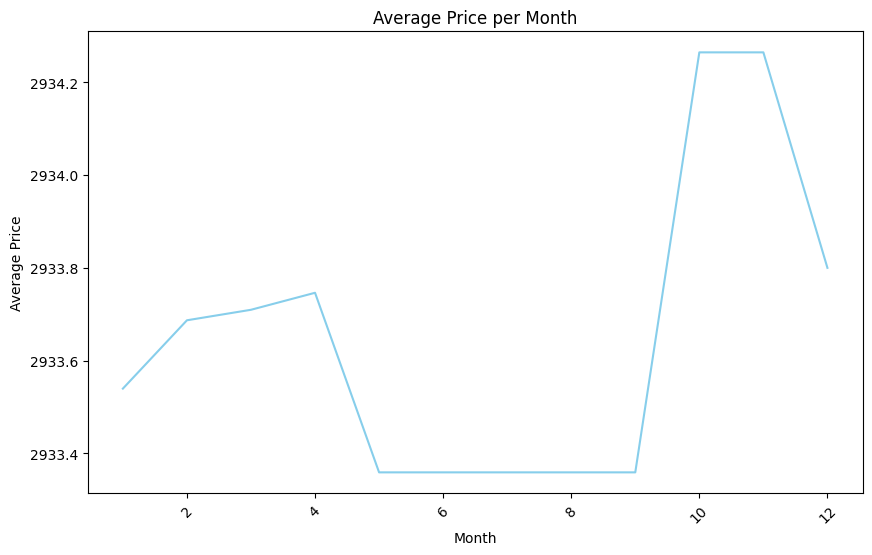

In [27]:

# Group the data by 'Month' and calculate the average price for each month
average_price_per_month = cleaned_calendar_data.groupby(['Month'])['price'].mean().reset_index()

# Plot the average price per month
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_month, x='Month', y='price', color='skyblue')
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

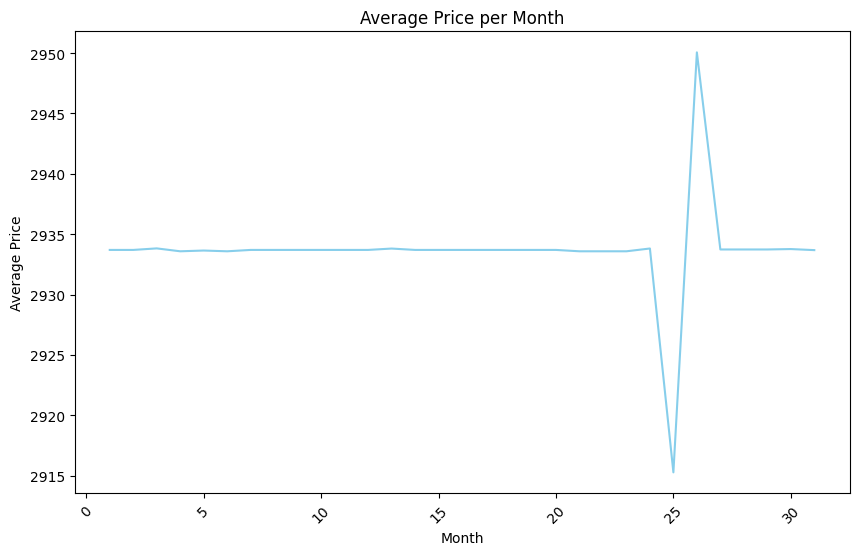

In [28]:
# Group the data by 'day_of_month' and calculate the average price for each day
average_price_per_day = cleaned_calendar_data.groupby(['Day'])['price'].mean().reset_index()
# Plot the average price per month
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_day, x='Day', y='price', color='skyblue')
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

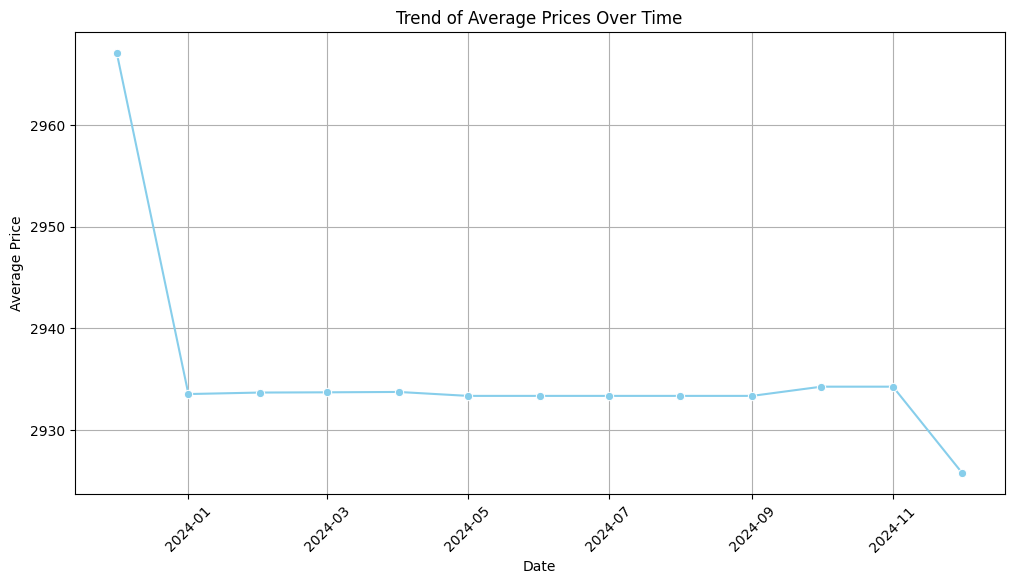

In [29]:
# Group the data by 'Month' and calculate the average price for each month
average_price_per_month = cleaned_calendar_data.groupby(['Year', 'Month'])['price'].mean().reset_index()

# Convert 'Year' and 'Month' to a datetime format
average_price_per_month['Date'] = pd.to_datetime(average_price_per_month[['Year', 'Month']].assign(day=1))

# Plot the trend of average prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_month, x='Date', y='price', marker='o', color='skyblue')
plt.title('Trend of Average Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-22a638e91e4d>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=average_price_per_neighborhood, x='Month', y='price', hue='bangkok_neighbourhood', marker='o', palette='Set2', ci=None)


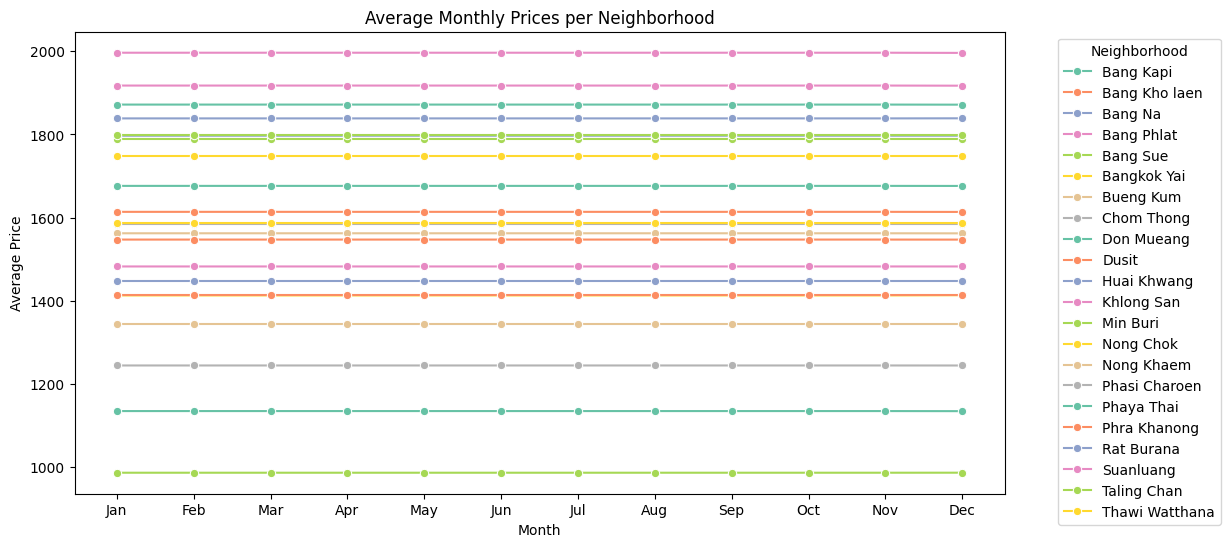

In [30]:
# Merge the calendar data with the cleaned listings data to get the neighborhood information
merged_data = pd.merge(cleaned_calendar_data, cleaned_listings_data[['id', 'bangkok_neighbourhood']], left_on='listing_id', right_on='id', how='left')

# Group the merged data by 'bangkok_neighbourhood' and 'Month' and calculate the average price for each group
average_price_per_neighborhood = merged_data.groupby(['bangkok_neighbourhood', 'Month'])['price'].mean().reset_index()

# Filter out average prices over $10,000
average_price_per_neighborhood = average_price_per_neighborhood[average_price_per_neighborhood['price'] <= 2000]

# Plot the average prices per neighborhood for each month
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_neighborhood, x='Month', y='price', hue='bangkok_neighbourhood', marker='o', palette='Set2', ci=None)
plt.title('Average Monthly Prices per Neighborhood')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set month names for better readability
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##Summary Statistics

In [31]:
cleaned_calendar_data.describe()

,listing_id,price,minimum_nights,maximum_nights,Month,Day,Year
count,8.068298e+06,8.068298e+06,8.068298e+06,8.068298e+06,8.068298e+06,8.068298e+06,8.068298e+06
mean,4.311437e+17,2.933650e+03,1.374822e+01,7.899420e+05,6.498861e+00,1.573144e+01,2.023984e+03
std,4.449914e+17,2.319410e+04,4.378792e+01,4.115962e+07,3.444086e+00,8.809771e+00,1.254398e-01
min,2.793400e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.023000e+03
25%,2.924240e+07,8.000000e+02,1.000000e+00,3.650000e+02,4.000000e+00,8.000000e+00,2.024000e+03
50%,5.381517e+07,1.300000e+03,2.000000e+00,1.125000e+03,7.000000e+00,1.600000e+01,2.024000e+03
75%,8.897157e+17,2.200000e+03,1.300000e+01,1.125000e+03,9.000000e+00,2.300000e+01,2.024000e+03
max,1.053584e+18,2.205309e+06,1.115000e+03,2.147484e+09,1.200000e+01,3.100000e+01,2.024000e+03


#Graphs of Listings Data

##Neighbourhood group


In [32]:
cleaned_listings_data['bangkok_neighbourhood'].value_counts()

bangkok_neighbourhood
Vadhana                 3087
Khlong Toei             3003
Huai Khwang             1743
Ratchathewi             1444
Sathon                   927
Bang Rak                 867
Phra Khanong             756
Phra Nakhon              754
Chatu Chak               671
Din Daeng                541
Parthum Wan              527
Bang Na                  510
Suanluang                510
Khlong San               470
Phaya Thai               412
Bang Kapi                397
Bang Phlat               346
Bang Sue                 289
Yan na wa                248
Lat Krabang              228
Don Mueang               206
Thon buri                203
Bangkok Noi              175
Pra Wet                  172
Samphanthawong           167
Phasi Charoen            156
Bang Kho laen            154
Pom Prap Sattru Phai     151
Lak Si                   142
Wang Thong Lang          141
Bang Khen                119
Dusit                    109
Bangkok Yai              106
Chom Thong           

<ipython-input-33-d5d492a74ad0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


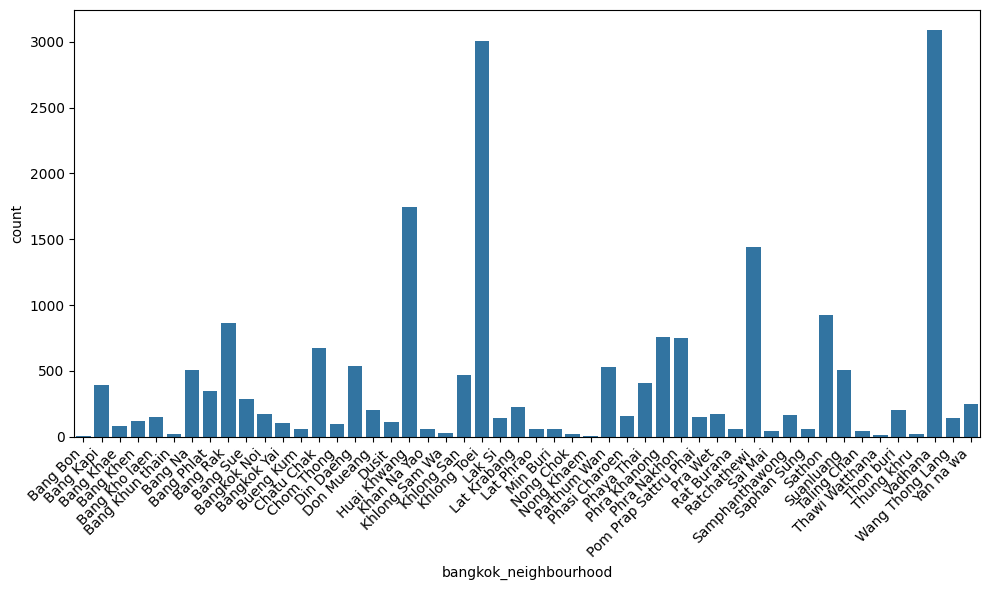

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="bangkok_neighbourhood", data=cleaned_listings_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

The Vandha neighbourhood has the most listings. Followed by Khlong Toei.

## Room type

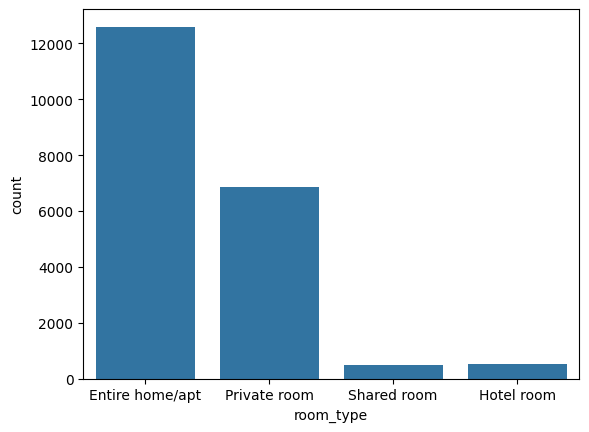

In [34]:
ax = sns.countplot(x="room_type", data=cleaned_listings_data)

An entire home/apt is the most common room type.

## Neighbourhood vs availability of room

<ipython-input-35-431adc50ccc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=cleaned_listings_data, x='bangkok_neighbourhood',y='days_available_365', palette='deep')
<ipython-input-35-431adc50ccc4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


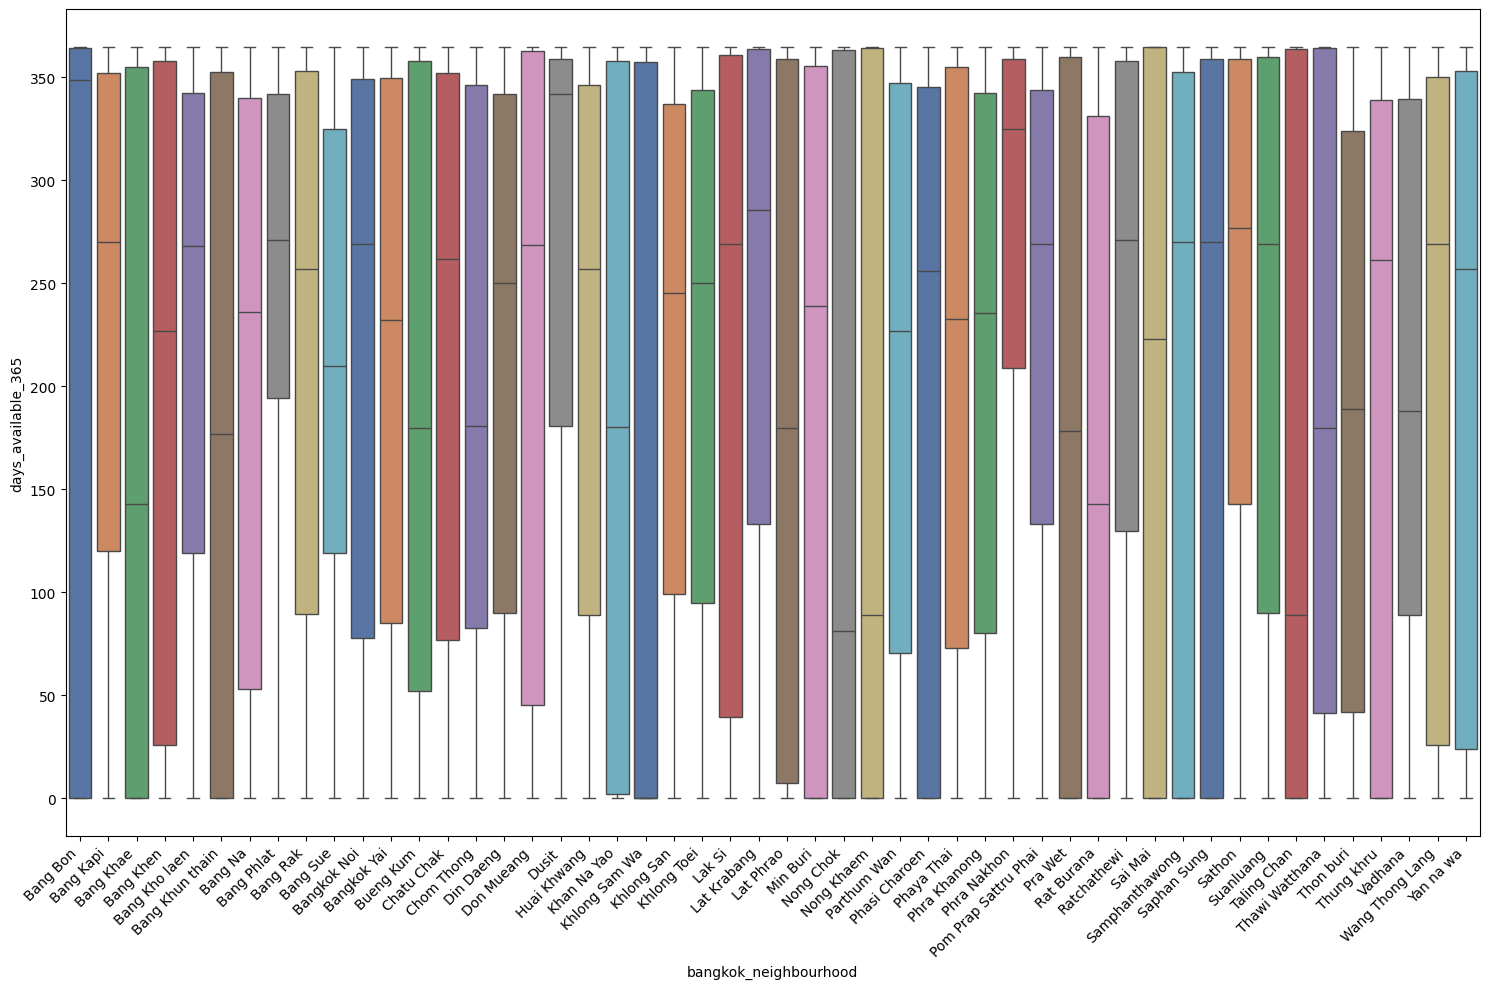

In [35]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=cleaned_listings_data, x='bangkok_neighbourhood',y='days_available_365', palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Kholong sam wai has the lowest followed by Nong Chok. But, it also only has 31 and 19 listings...

<ipython-input-36-3a7f0ef10c28>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_days['bangkok_neighbourhood'], rotation=45, ha="right")


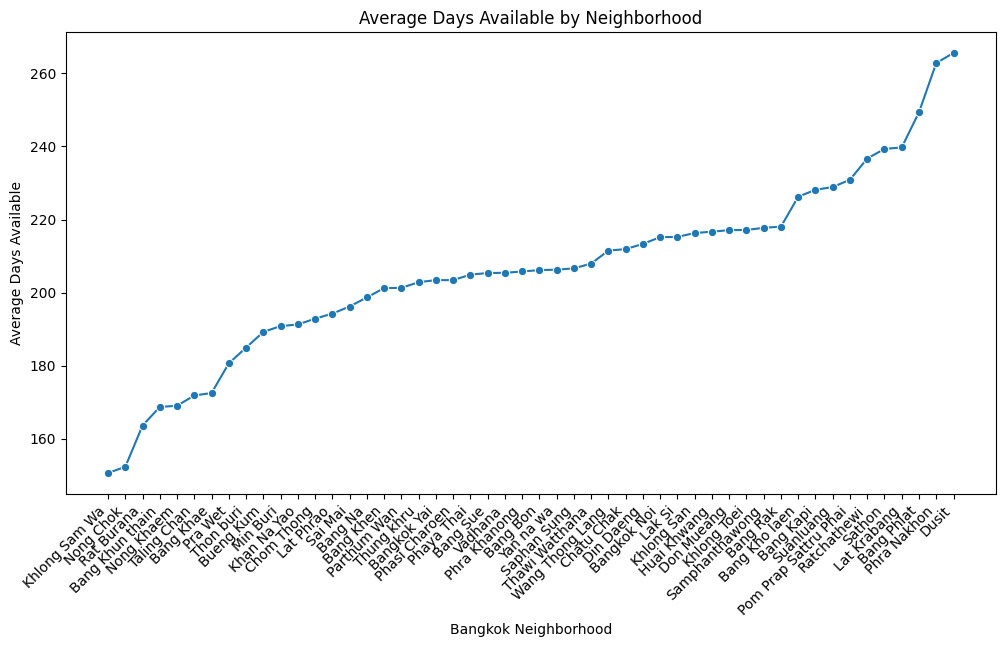

In [36]:
# Calculate the mean 'days_available_365' for each neighborhood
mean_days = cleaned_listings_data.groupby('bangkok_neighbourhood')['days_available_365'].mean().reset_index()

# Sort the neighborhoods by the mean days available (Alternatively, sort by 'bangkok_neighbourhood' for alphabetical)
mean_days = mean_days.sort_values('days_available_365')

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=mean_days, x='bangkok_neighbourhood', y='days_available_365', marker='o')

# Improve readability
ax.set_xticklabels(mean_days['bangkok_neighbourhood'], rotation=45, ha="right")
ax.set_xlabel('Bangkok Neighborhood')
ax.set_ylabel('Average Days Available')
ax.set_title('Average Days Available by Neighborhood')

plt.show()

<ipython-input-37-b5cd21805aa3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_data['bangkok_neighbourhood'], rotation=45, ha='right')


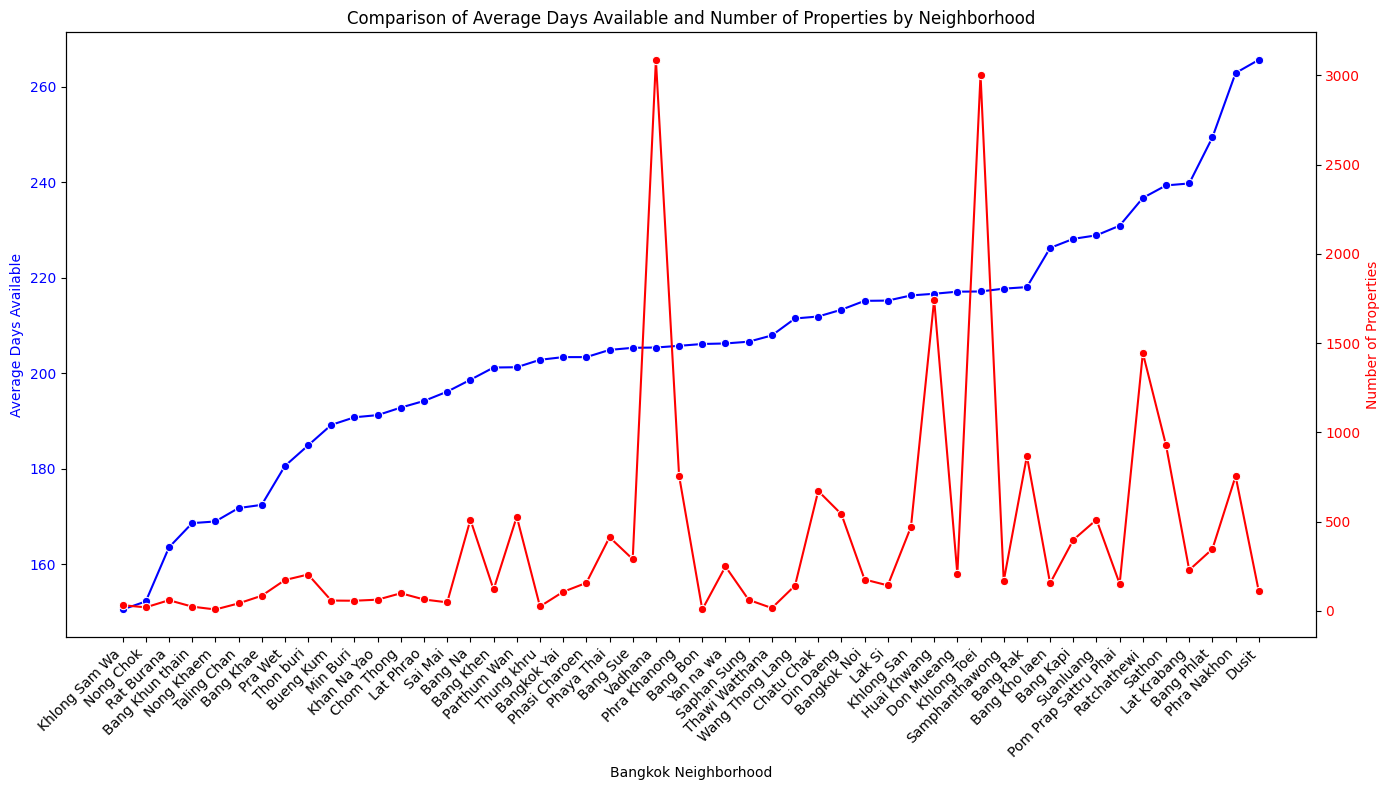

In [37]:
# Calculate the mean 'days_available_365' and count of properties for each neighborhood
grouped_data = cleaned_listings_data.groupby('bangkok_neighbourhood')['days_available_365'].agg(['mean', 'count']).reset_index()
grouped_data.columns = ['bangkok_neighbourhood', 'average_days_available', 'number_of_properties']

# Sort the data by average days available for a meaningful line progression
grouped_data = grouped_data.sort_values('average_days_available')

# Create a plot
plt.figure(figsize=(14, 8))
ax1 = sns.lineplot(data=grouped_data, x='bangkok_neighbourhood', y='average_days_available', marker='o', color='b')
ax1.set_xticklabels(grouped_data['bangkok_neighbourhood'], rotation=45, ha='right')
ax1.set_xlabel('Bangkok Neighborhood')
ax1.set_ylabel('Average Days Available', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary axis
ax2 = ax1.twinx()
sns.lineplot(data=grouped_data, x='bangkok_neighbourhood', y='number_of_properties', marker='o', color='r', ax=ax2)
ax2.set_ylabel('Number of Properties', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Comparison of Average Days Available and Number of Properties by Neighborhood')
plt.tight_layout()
plt.show()


Vadhana has the heighest number of properties but its average day avialble is 200. This suggests that this is a tourist hotspot.

##Room type vs availability

<ipython-input-38-3fb9e8d21fe4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=cleaned_listings_data, x='room_type',y='days_available_365', palette='deep')


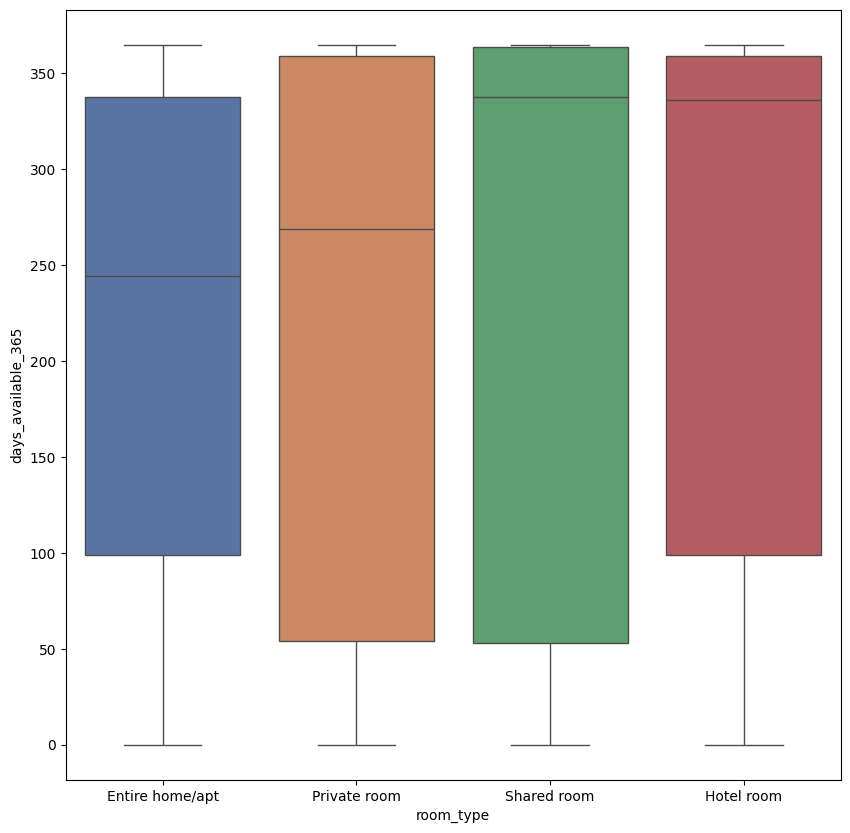

In [38]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=cleaned_listings_data, x='room_type',y='days_available_365', palette='deep')

Entire homes have the lowest average days available. Hotel and shared rooms have about the same number of days available. But, that makes sense since a single hotel has many more rooms than 1 house, and a shared room can sleep many people so theres more availility for more people.

##Map of Bangkok with neighbourhood groups

In [39]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
fig = px.scatter(cleaned_listings_data, x='longitude', y='latitude',
                 color='bangkok_neighbourhood')
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

##Host

<ipython-input-40-148cb4f17bf8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-148cb4f17bf8>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-40-148cb4f17bf8>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



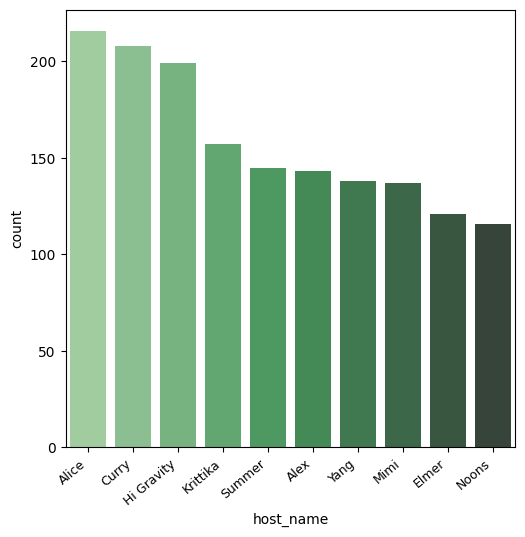

In [40]:
plt.subplot(224)
ax=sns.countplot(x="host_name", data=cleaned_listings_data, palette="Greens_d",
              order=cleaned_listings_data.host_name.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

Alice has the most listings followed by Curry and Hi Gravity.

##Distribution Plots

<ipython-input-41-3b3c1ac04213>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-41-3b3c1ac04213>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-41-3b3c1ac04213>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for

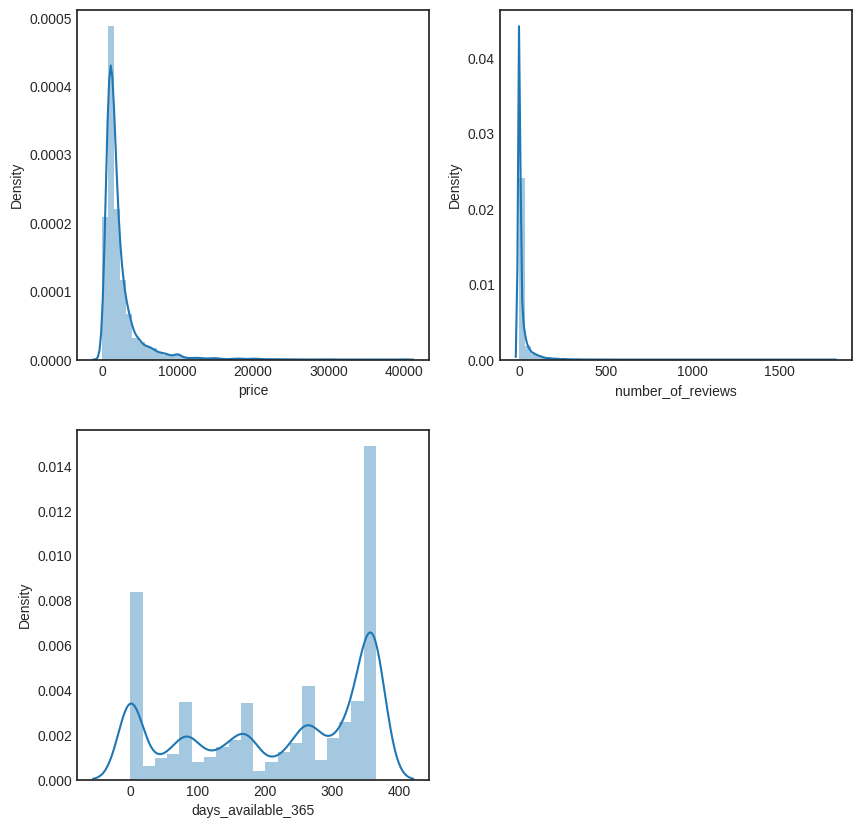

In [41]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.distplot(cleaned_listings_data['price'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(222)
sns.distplot(cleaned_listings_data['number_of_reviews'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(223)
sns.distplot(cleaned_listings_data['days_available_365'])
fig = plt.gcf()
fig.set_size_inches(10,10)


Price and Number of Reviews have a right skewed distribution
Days avaiilable has a left/unstable distrbtion.

#Clean a little more and do coorelations

##Find non numeric columns

In [42]:
cleaned_num_listings_data = cleaned_listings_data.select_dtypes(include=['object']).columns

cleaned_num_listings_data

Index(['listing_url', 'listing_name', 'host_name', 'bangkok_neighbourhood',
       'property_type', 'room_type', 'available'],
      dtype='object')

##Remove unncessary non-numeric columns

Bangkok_neighborhoud: 50 neighborhoods (1 - 50)

Property Type: Entire condo, Private room in rental unit, Entire guesthouse - get rid  of 82 unique but a lot are similar and doesnt tell me anything dif than room type

Room Type - 4 types so just 1 = entire home, 2 = private room, 3 = shared room, 4=hotel

Maybe get rid of host name and only keep host_id - it can be linked to host name for presenting it but not used in analysis

Don't use listing name or listing_url

listing id links to calendar data


In [43]:
cleaned_num_listings_data = cleaned_listings_data.drop(['listing_url', 'listing_name', 'available', 'property_type', 'host_name'], axis=1)

In [44]:
cleaned_num_listings_data.select_dtypes(include=['object']).columns

Index(['bangkok_neighbourhood', 'room_type'], dtype='object')

##Convert remaining non-numeric columns to numeric

In [45]:
categorical_cols = cleaned_num_listings_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
cleaned_listings_data_numerical1 = pd.get_dummies(cleaned_num_listings_data, columns=categorical_cols)

from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoder = LabelEncoder()
    cleaned_num_listings_data[col] = label_encoder.fit_transform(cleaned_num_listings_data[col])
    label_encoders[col] = label_encoder  # Store the label encoder for each column
cleaned_num_listings_data = cleaned_num_listings_data.dropna()
cleaned_num_listings_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12785 entries, 7904 to 1516
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           12785 non-null  int64  
 1   host_id                      12785 non-null  int64  
 2   host_listings_count          12785 non-null  int64  
 3   bangkok_neighbourhood        12785 non-null  int64  
 4   latitude                     12785 non-null  float64
 5   longitude                    12785 non-null  float64
 6   room_type                    12785 non-null  int64  
 7   guest_capacity               12785 non-null  int64  
 8   bathrooms                    12785 non-null  float64
 9   beds                         12785 non-null  float64
 10  price                        12785 non-null  float64
 11  minimum_nights_required      12785 non-null  int64  
 12  maximum_nights               12785 non-null  int64  
 13  days_available_30  

In [46]:
cleaned_num_listings_data.head()

,id,host_id,host_listings_count,bangkok_neighbourhood,latitude,longitude,room_type,guest_capacity,bathrooms,beds,price,minimum_nights_required,maximum_nights,days_available_30,days_available_60,days_available_90,days_available_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
7904,37266430,169629900,3,0,13.648950,100.405230,0,2,1.0,2.0,1200.0,14,360,0,0,0,0,1,5.0,5.00,5.0,5.0,5.0,5.0,5.00
16276,879991666649774041,172981732,3,0,13.660378,100.363735,0,10,3.0,4.0,3600.0,1,1125,14,44,74,349,2,4.0,4.50,3.0,4.5,5.0,4.5,4.50
9843,42919866,341361309,1,1,13.749560,100.606340,0,1,1.0,1.0,1720.0,2,1125,29,59,89,179,1,5.0,5.00,5.0,5.0,5.0,5.0,5.00
4062,22559178,165770980,1,1,13.761680,100.640840,0,4,2.0,2.0,2299.0,1,365,24,48,77,352,4,5.0,4.75,5.0,5.0,5.0,4.5,4.75
16536,888704290577772271,276781306,72,1,13.757530,100.639240,0,4,1.0,2.0,1179.0,28,365,28,58,88,363,1,4.0,4.00,4.0,3.0,4.0,3.0,4.00


#Coorelations

##Coorelation Matrix

In [47]:
correlation_matrix = cleaned_num_listings_data.corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                   id   host_id  host_listings_count  \
id                           1.000000  0.473878             0.148014   
host_id                      0.473878  1.000000             0.054341   
host_listings_count          0.148014  0.054341             1.000000   
bangkok_neighbourhood        0.035674  0.010961             0.027529   
latitude                    -0.032466  0.026081            -0.036089   
longitude                    0.064591  0.061961            -0.002488   
room_type                   -0.134833  0.015163            -0.188236   
guest_capacity              -0.026516 -0.037427            -0.038493   
bathrooms                   -0.045240 -0.005813            -0.090488   
beds                        -0.064133 -0.034570            -0.072366   
price                        0.047302  0.045108             0.042429   
minimum_nights_required     -0.081195 -0.060553            -0.032292   
maximum_nights              -0.154028 -0.081

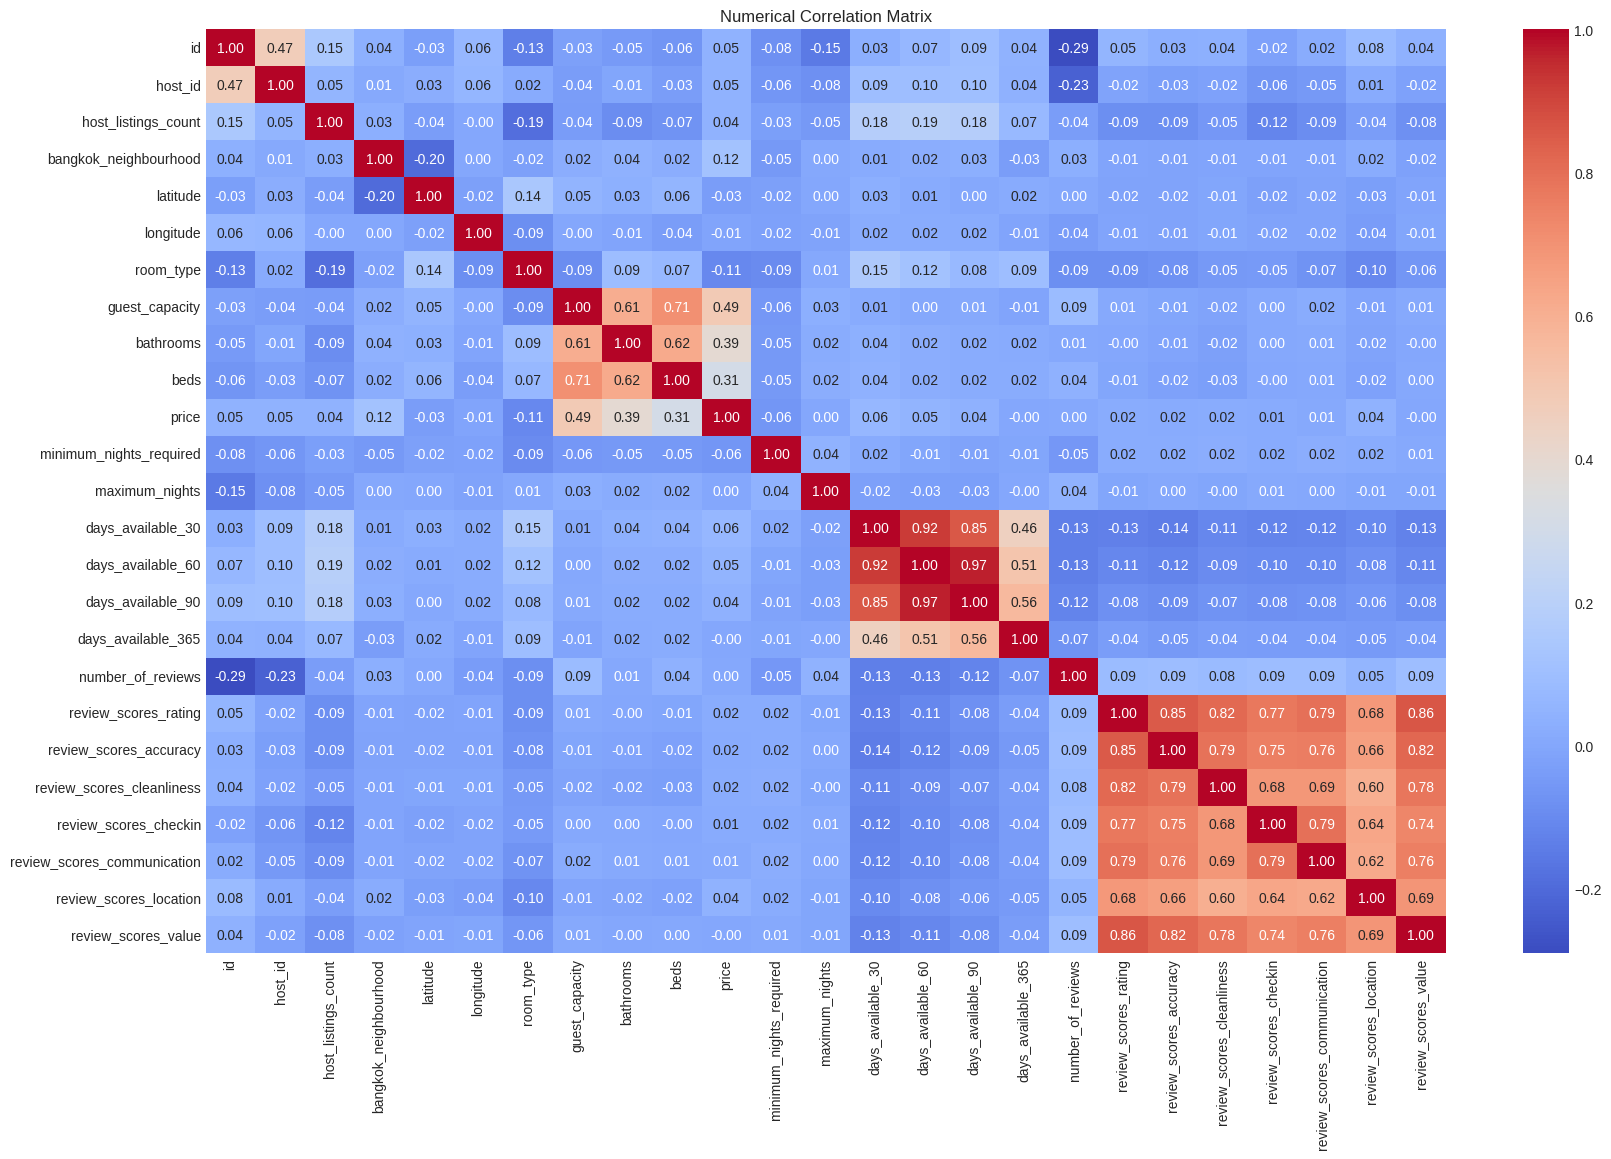

In [48]:

# Visualizing the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Correlation Matrix')
plt.show()


In [49]:
#relevant_features = correlation_matrix.columns[(correlation_matrix.abs() > 0.8).any()].tolist()
#sns.pairplot(cleaned_num_listings_data[relevant_features])

##About Coorelations

Relationships with higher coorelations

    Positive Correlations:
        id and host_id: 0.474
        host_listings_count and days_available_30: 0.182
        host_listings_count and days_available_60: 0.189
        host_listings_count and days_available_90: 0.180
        guest_capacity and bathrooms: 0.609
        guest_capacity and beds: 0.706
        guest_capacity and price: 0.491
        bathrooms and beds: 0.618
        bathrooms and price: 0.392
        beds and price: 0.309
        days_available_30 and days_available_60: 0.924
        days_available_30 and days_available_90: 0.855
        days_available_30 and days_available_365: 0.455
        days_available_60 and days_available_90: 0.965
        days_available_60 and days_available_365: 0.512
        days_available_90 and days_available_365: 0.564
        review_scores_rating and review_scores_accuracy: 0.852
        review_scores_rating and review_scores_cleanliness: 0.816
        review_scores_rating and review_scores_checkin: 0.775
        review_scores_rating and review_scores_communication: 0.794
        review_scores_rating and review_scores_value: 0.861
        review_scores_accuracy and review_scores_cleanliness: 0.789
        review_scores_accuracy and review_scores_checkin: 0.753
        review_scores_accuracy and review_scores_communication: 0.762
        review_scores_accuracy and review_scores_value: 0.823
        review_scores_cleanliness and review_scores_checkin: 0.683
        review_scores_cleanliness and review_scores_communication: 0.687
        review_scores_cleanliness and review_scores_value: 0.779
        review_scores_checkin and review_scores_communication: 0.793
        review_scores_checkin and review_scores_value: 0.736
        review_scores_communication and review_scores_value: 0.755

    Negative Correlations:
        room_type and host_listings_count: -0.188
        room_type and review_scores_rating: -0.087
        number_of_reviews and days_available_30: -0.134
        number_of_reviews and days_available_60: -0.135
        number_of_reviews and days_available_90: -0.123
        days_available_30 and review_scores_accuracy: -0.141
        days_available_30 and review_scores_rating: -0.133
        days_available_30 and review_scores_value: -0.126

##Plots of Meaningful Coorelations

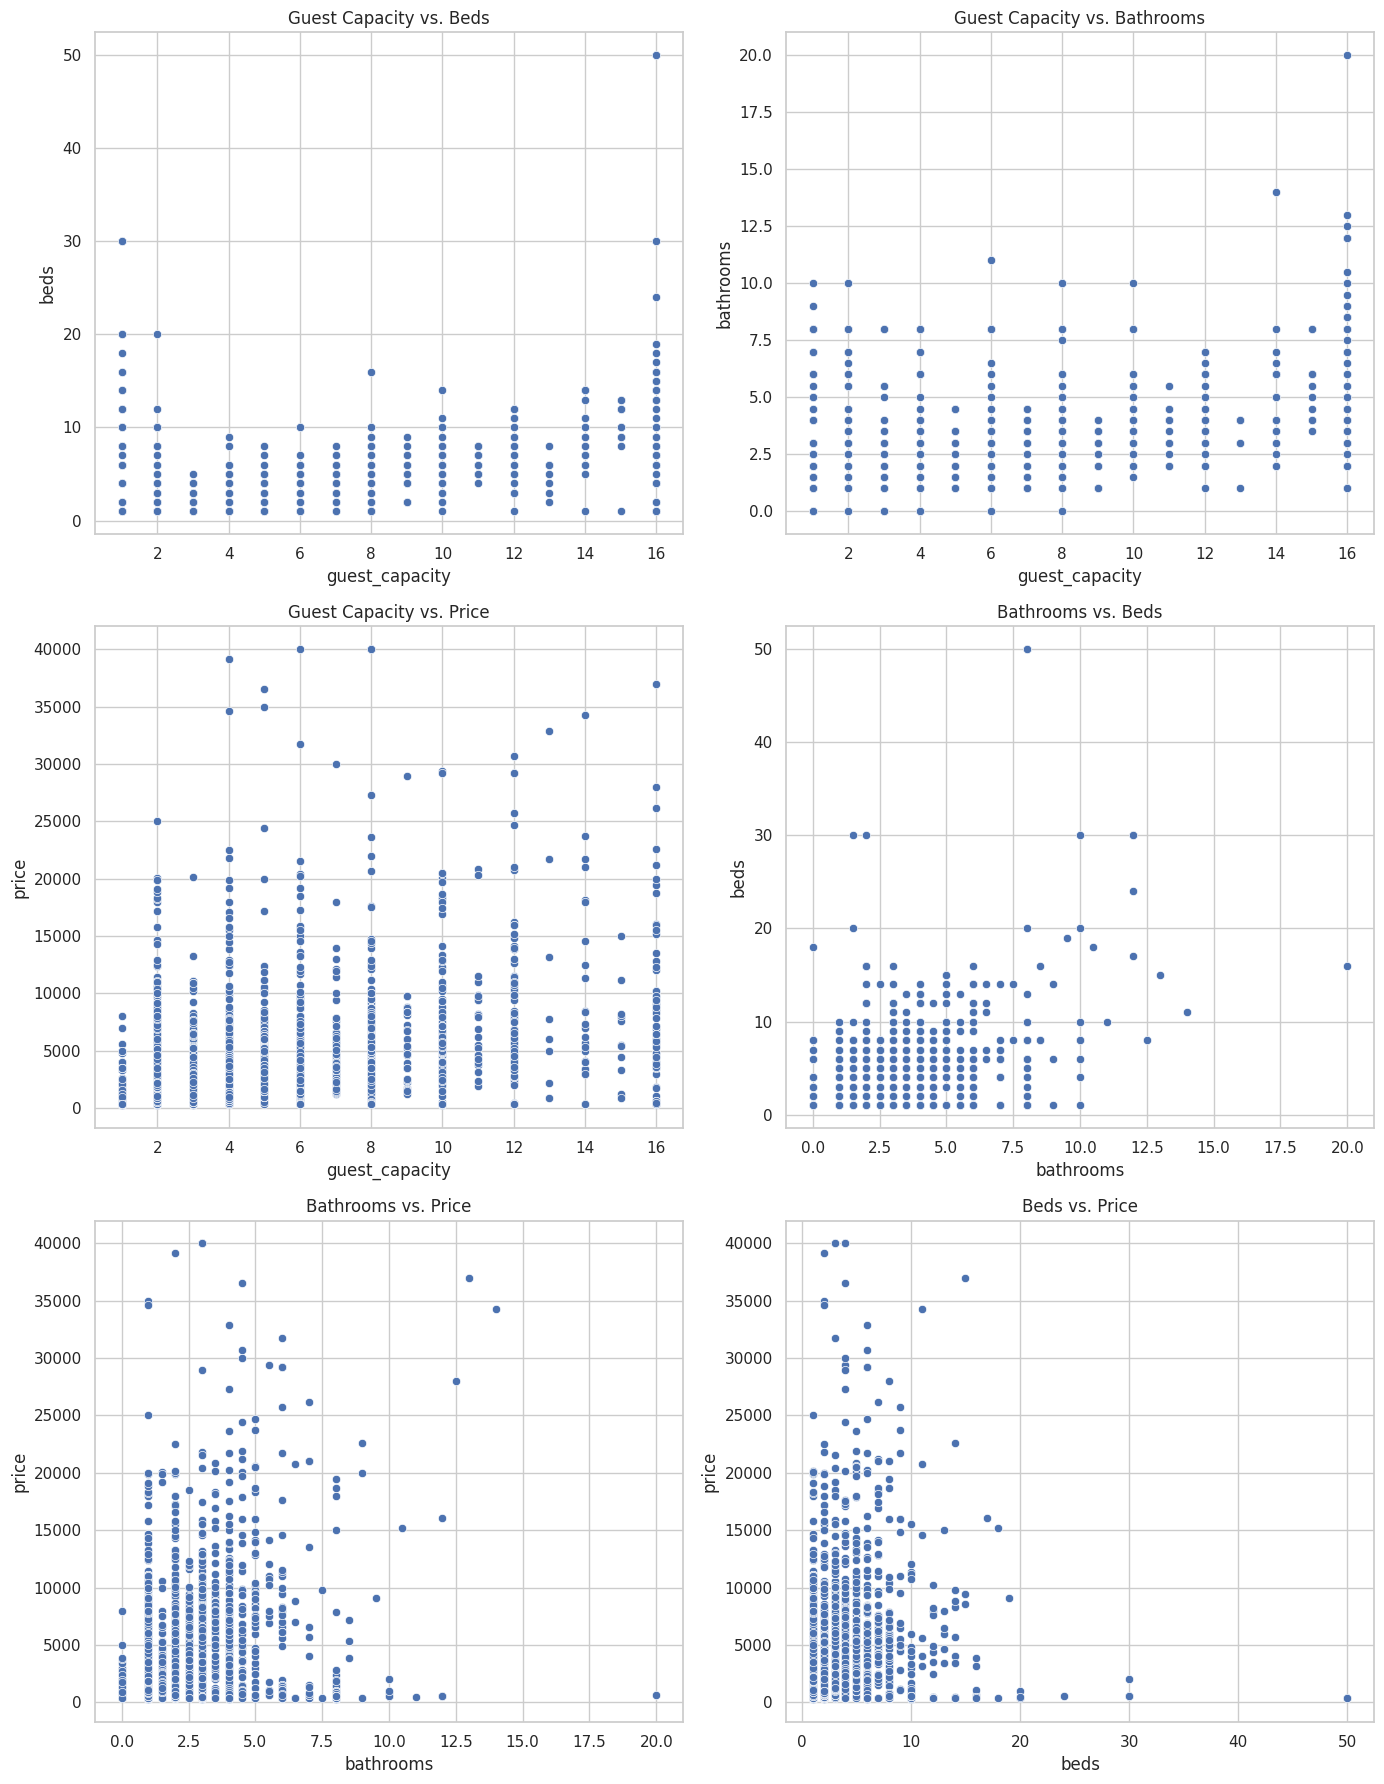

In [50]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# Guest Capacity vs Beds
sns.scatterplot(x='guest_capacity', y='beds', data=cleaned_num_listings_data, ax=axs[0, 0])
axs[0, 0].set_title('Guest Capacity vs. Beds')

# Guest Capacity vs Bathrooms
sns.scatterplot(x='guest_capacity', y='bathrooms', data=cleaned_num_listings_data, ax=axs[0, 1])
axs[0, 1].set_title('Guest Capacity vs. Bathrooms')

# Guest Capacity vs Price
sns.scatterplot(x='guest_capacity', y='price', data=cleaned_num_listings_data, ax=axs[1, 0])
axs[1, 0].set_title('Guest Capacity vs. Price')

# Bathrooms vs Beds
sns.scatterplot(x='bathrooms', y='beds', data=cleaned_num_listings_data, ax=axs[1, 1])
axs[1, 1].set_title('Bathrooms vs. Beds')

# Bathrooms vs Price
sns.scatterplot(x='bathrooms', y='price', data=cleaned_num_listings_data, ax=axs[2, 0])
axs[2, 0].set_title('Bathrooms vs. Price')

# Beds vs Price
sns.scatterplot(x='beds', y='price', data=cleaned_num_listings_data, ax=axs[2, 1])
axs[2, 1].set_title('Beds vs. Price')

plt.tight_layout()
plt.show()

#Merge 2 datasets

In [51]:
# Join the datasets on the listing ID
#merged_data = pd.merge(cleaned_calendar_data, cleaned_num_listings_data, left_on='listing_id', right_on='id', how='inner')

# Drop the redundant 'id' column from listing_data
#merged_data.drop(columns=['id'], inplace=True)


In [52]:
#merged_data = merged_data.dropna()
#merged_data.head()

#Regression to predict price

I'm going to use bangkok_neighbourhood, room_type, guest_capacity, bathrooms, beds, and review_scores_rating to try to predict price.

It doesnt look like our feautures are very coorelated.

In [373]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seed for reproducibility
np.random.seed(42)


In [374]:
# Copy all the predictor variables into X dataframe
X = cleaned_num_listings_data.drop('price', axis=1)

# Copy target into the y dataframe.
y = cleaned_num_listings_data[['price']]
X.head()

,id,host_id,host_listings_count,bangkok_neighbourhood,latitude,longitude,room_type,guest_capacity,bathrooms,beds,minimum_nights_required,maximum_nights,days_available_30,days_available_60,days_available_90,days_available_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
7904,37266430,169629900,3,0,13.648950,100.405230,0,2,1.0,2.0,14,360,0,0,0,0,1,5.0,5.00,5.0,5.0,5.0,5.0,5.00
16276,879991666649774041,172981732,3,0,13.660378,100.363735,0,10,3.0,4.0,1,1125,14,44,74,349,2,4.0,4.50,3.0,4.5,5.0,4.5,4.50
9843,42919866,341361309,1,1,13.749560,100.606340,0,1,1.0,1.0,2,1125,29,59,89,179,1,5.0,5.00,5.0,5.0,5.0,5.0,5.00
4062,22559178,165770980,1,1,13.761680,100.640840,0,4,2.0,2.0,1,365,24,48,77,352,4,5.0,4.75,5.0,5.0,5.0,4.5,4.75
16536,888704290577772271,276781306,72,1,13.757530,100.639240,0,4,1.0,2.0,28,365,28,58,88,363,1,4.0,4.00,4.0,3.0,4.0,3.0,4.00


In [375]:
#drop columns that I dont want to use for prediction
X = X.drop([
    'id', 'host_id', 'host_listings_count',
    'days_available_30', 'days_available_60', 'days_available_90',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'latitude', 'longitude', 'minimum_nights_required', 'maximum_nights', 'days_available_365', 'number_of_reviews'
], axis=1)

In [376]:
X.head()

,bangkok_neighbourhood,room_type,guest_capacity,bathrooms,beds,review_scores_rating
7904,0,0,2,1.0,2.0,5.0
16276,0,0,10,3.0,4.0,4.0
9843,1,0,1,1.0,1.0,5.0
4062,1,0,4,2.0,2.0,5.0
16536,1,0,4,1.0,2.0,4.0


decided to try scaling the data and it gave lower MSEs but R2 was the same

In [261]:
#scaler = RobustScaler()
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)


##Plot my data

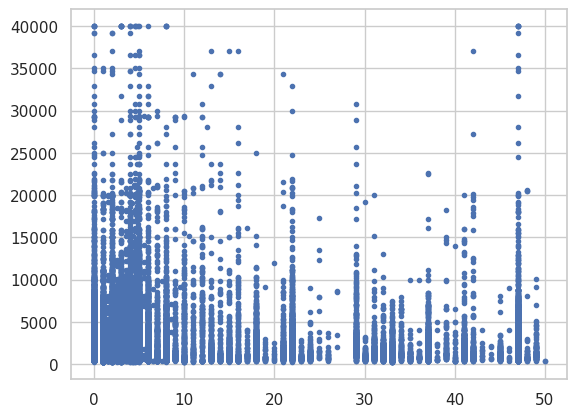

In [362]:
plt.plot(X, y, "b.")
plt.show()

Looks very random, but thee is a downward trend. Not sure lin regression would be best for this data though as there are distict clusters and non linear relationships. y is a continous variable (price) while x is not and has discrete data. Random forest regression might work. I can also try polynomial regression. But I dont think that would work with this data.

##Try linear regression

In [377]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [378]:
from sklearn.linear_model import LinearRegression #import library
lin_reg = LinearRegression() #instantiate model
lin_reg.fit(X, y) # Fit model
y_pred = lin_reg.predict(X_test)
lin_reg.intercept_, lin_reg.coef_ #access intercept and coeffecients

(array([-537.86335041]),
 array([[  19.10984653, -206.47501769,  556.35942426,  533.34894265,
         -197.02940239,   39.56501252]]))

In [379]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4226729.312154886


Really high MSE error

In [380]:
# Calculate Mean Squared Error
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 2055.901094934989


In [381]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.2928318275323927

R^2 is 0.292. Which is low. Meaning that the model doesnt fit the points well and will not be able to accurately predict the price

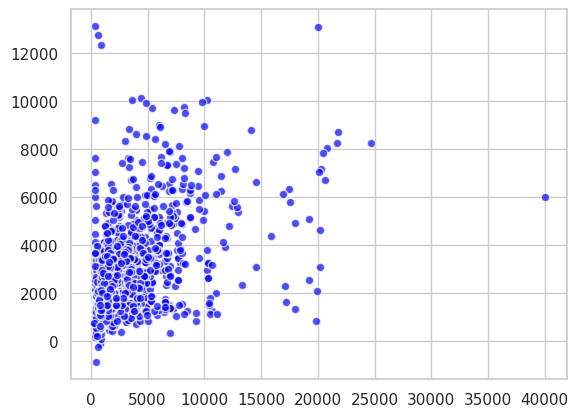

In [382]:
# Scatter plot of the predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', color='blue')  # Adjust alpha for transparency, edgecolor for clarity

plt.show()

As expected, linear regression was not a good model to use on my data.

##Trying other models

In [383]:

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

###linear regression error analysis

   Actual Values  Predicted Values
0          938.0       2178.288127
1          950.0       1189.149013
2          850.0       1720.515190
3          634.0       1696.776182
4          790.0       2274.275501


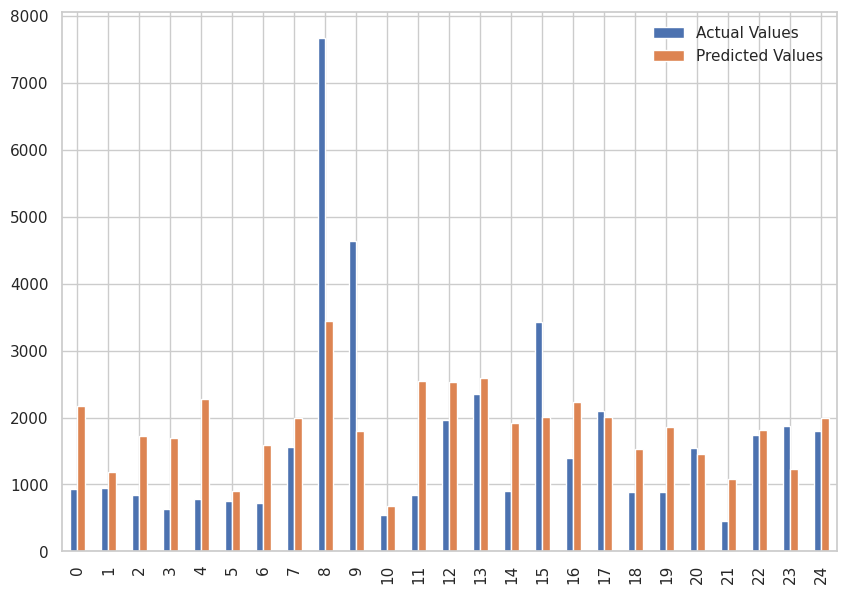

In [384]:
#linear regression error analysis

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.show()

The predicted and actual values are pretty far off for most.

###Lasso Regression

R2 score:  0.29174386466680857
RMSE:  2057.4819667129223
   Actual Values  Predicted Values
0          938.0       2195.334644
1          950.0       1170.598536
2          850.0       1732.079164
3          634.0       1719.221890
4          790.0       2322.659373


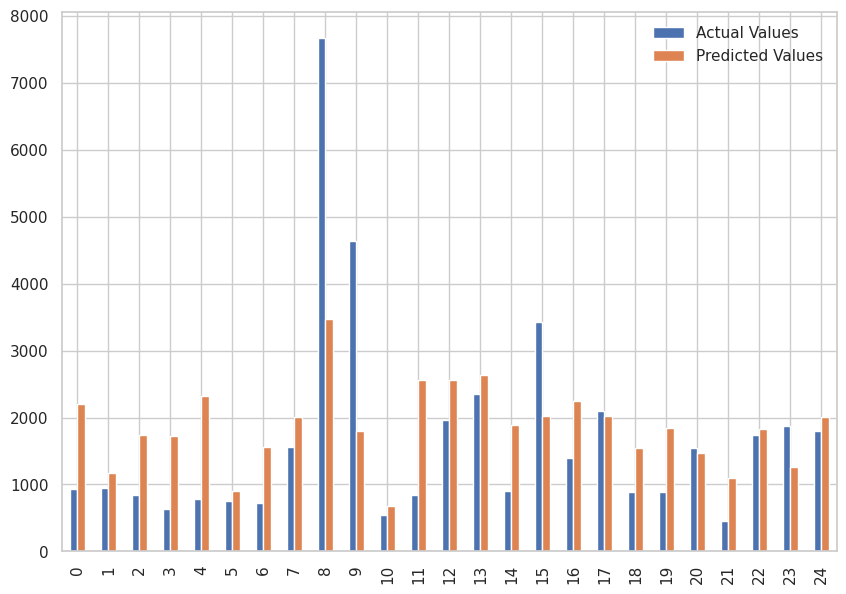

In [386]:
#Lasso regression
regL1 = Lasso(alpha=0.001)
regL1.fit(X_train, y_train)

y_pred=regL1.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.show()


###Decision Tree

R2 score:  -0.04729755255762691
RMSE:  2501.934346108779
   Actual Values  Predicted Values
0          938.0        680.000000
1          950.0        800.000000
2          850.0       1544.283019
3          634.0       1200.000000
4          790.0        380.000000


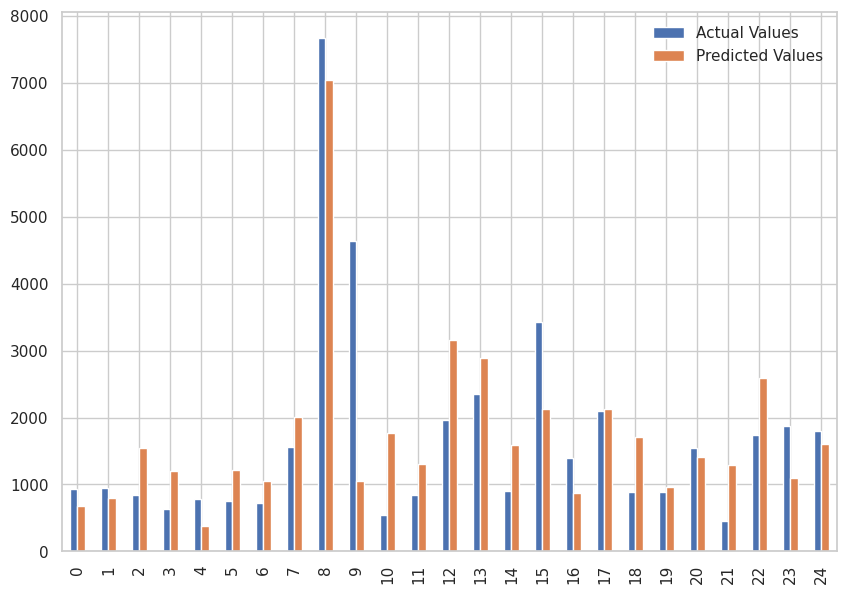

In [387]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_pred=DTree.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.show()

This model gave the closest to the predicted values.

###Random Forest

<ipython-input-388-29a26c790121>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R2 score:  44.47642984404977
RMSE:  1821.7113176931068
   Actual Values  Predicted Values
0          938.0       1165.894919
1          950.0       1129.864009
2          850.0       1530.374264
3          634.0        990.690785
4          790.0        756.594165


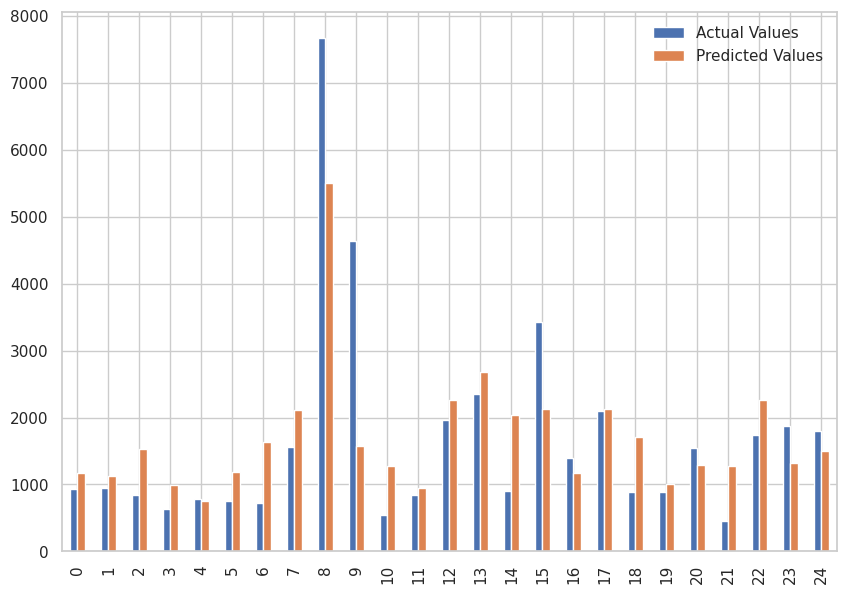

In [388]:
#Random forest regression
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train, y_train)

y_pred=regrRM2.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.show()

My data is not contineous aside from price.

Price prediction models are not performing well. It might help to transform continuous variables into categorical variables. So price into ranges.. - create bins and then use Ordinal regression.
Try decision tree or randomforest, Gradient Boosting regression. I'm not sure what model would fit my data. When I read papers online relating to predicting Airbnb prices, I havent seen any models that predict them accuratly.